## PART A : Data Acquisition 

## IMPORT LIBRARAES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer


all the libraries is import that is required for this mega project

## READ & LOAD CSV FILE

In [3]:
df = pd.read_csv("customer_credit_risk_dataset_1000_records.csv")

df.head()


,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,56.0,Female,North,Secondary,Salaried,2273654.0,1390573,Other,507.0,0,96,36.89,2022-10-30,1
1,CUST1001,69.0,Male,North,Post-Graduate,Self-Employed,655425.0,579308,Business,635.0,1,18,33.55,2020-08-16,0
2,CUST1002,46.0,Female,South,Graduate,Self-Employed,227032.0,166149,Business,512.0,1,90,79.82,2021-04-21,0
3,CUST1003,32.0,Male,North,Secondary,Self-Employed,688986.0,1443119,Car,520.0,0,34,73.76,2018-10-14,1
4,CUST1004,60.0,Male,South,Primary,Salaried,512206.0,303958,Home,443.0,1,48,51.20,2024-08-19,0


Read the customer_credit_risk_dataset_1000_records and display all the records 

## Load & parse JSON file

In [4]:
import pandas as pd

df_sql = pd.read_json("dummy_customer_data.json")

df_sql


,customer_id,age,gender,income,credit_score,loan_amount,default
0,1,25,Male,45000,680,120000,No
1,2,32,Female,62000,720,200000,No
2,3,45,Male,38000,590,90000,Yes
3,4,29,Female,51000,705,150000,No
4,5,41,Male,47000,610,110000,Yes


i have create dummy json file.This file load and display records

## Fetch Records from SQL (Loan Repayment History)

In [5]:
import mysql.connector

conn = mysql.connector.connect(
    host = "localhost",
    username = "root",
    password = "tushar",
    database = "data"
    
)
    
sql = "select * from loan_repayment_history"
df_sql = pd.read_sql(sql,conn)

print(df_sql)

    
conn.close()    

   repayment_id  loan_id  customer_id repayment_date  amount_paid  \
0             1      101            1     2024-01-10       5000.0   
1             2      101            1     2024-02-10       5000.0   
2             3      102            2     2024-01-15       3000.0   
3             4      103            3     2024-02-01       4500.0   
4             5      104            4     2024-03-05       6000.0   

  payment_status  
0           Paid  
1           Paid  
2           Late  
3         Missed  
4           Paid  


C:\Users\hp\AppData\Local\Temp\ipykernel_2508\2909036352.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql(sql,conn)


loan_repayment_history table is create in mysql workbench with following parameters.

## Fetch World Bank API 

In [6]:

url = "https://api.worldbank.org/v2/country/IN/indicator/FP.CPI.TOTL.ZG?format=json"
response = requests.get(url)

data = response.json()

records = data[1]  


df_api = pd.json_normalize(records)


df_csv = df_api[[
    "country.value",
    "date",
    "value"
]]

df_csv.columns = ["country", "year", "inflation_rate"]

df_csv


,country,year,inflation_rate
0,India,2024,4.953036
1,India,2023,5.649143
2,India,2022,6.699034
3,India,2021,5.131407
4,India,2020,6.623437
5,India,2019,3.729506
6,India,2018,3.938826
7,India,2017,3.328173
8,India,2016,4.948216
9,India,2015,4.906973


fetch the records from the worldbank.org

## PART C : DATA UNDERSTANDING & CLEANING

## BASIC INFORMATION

In [7]:
df.head()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,CUST1000,56.0,Female,North,Secondary,Salaried,2273654.0,1390573,Other,507.0,0,96,36.89,2022-10-30,1
1,CUST1001,69.0,Male,North,Post-Graduate,Self-Employed,655425.0,579308,Business,635.0,1,18,33.55,2020-08-16,0
2,CUST1002,46.0,Female,South,Graduate,Self-Employed,227032.0,166149,Business,512.0,1,90,79.82,2021-04-21,0
3,CUST1003,32.0,Male,North,Secondary,Self-Employed,688986.0,1443119,Car,520.0,0,34,73.76,2018-10-14,1
4,CUST1004,60.0,Male,South,Primary,Salaried,512206.0,303958,Home,443.0,1,48,51.20,2024-08-19,0


Display top 5 records

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   str    
 1   age                913 non-null    float64
 2   gender             1000 non-null   str    
 3   region             1000 non-null   str    
 4   education_level    1000 non-null   str    
 5   employment_type    958 non-null    str    
 6   annual_income      978 non-null    float64
 7   loan_amount        1000 non-null   int64  
 8   loan_purpose       1000 non-null   str    
 9   credit_score       980 non-null    float64
 10  repayment_history  1000 non-null   int64  
 11  transaction_count  1000 non-null   int64  
 12  spending_ratio     1000 non-null   float64
 13  join_date          1000 non-null   str    
 14  default_flag       1000 non-null   int64  
dtypes: float64(4), int64(4), str(7)
memory usage: 117.3 KB


display the info of perticuler dataset

In [9]:
df.describe()

,age,annual_income,loan_amount,credit_score,repayment_history,transaction_count,spending_ratio,default_flag
count,913.000000,9.780000e+02,1.000000e+03,980.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.817087,1.488918e+06,8.544628e+05,595.970408,1.16400,60.434000,49.729010,0.178000
std,14.915495,1.402993e+06,6.848602e+05,168.436590,1.08917,33.232726,23.811646,0.382704
min,18.000000,8.021500e+04,3.162000e+04,300.000000,0.00000,5.000000,10.010000,0.000000
25%,31.000000,7.509900e+05,4.221142e+05,446.500000,0.00000,32.000000,28.662500,0.000000
50%,44.000000,1.317903e+06,7.757440e+05,596.000000,1.00000,59.000000,48.845000,0.000000
75%,56.000000,1.867500e+06,1.191729e+06,748.000000,2.00000,89.000000,71.210000,0.000000
max,69.000000,1.164207e+07,5.904413e+06,977.000000,7.00000,119.000000,89.900000,1.000000


Display the followings all the numerical column aggregate function

In [10]:
df.shape

(1000, 15)

## COUNT NULL VALUE

In [11]:
df.isnull().sum()

customer_id           0
age                  87
gender                0
region                0
education_level       0
employment_type      42
annual_income        22
loan_amount           0
loan_purpose          0
credit_score         20
repayment_history     0
transaction_count     0
spending_ratio        0
join_date             0
default_flag          0
dtype: int64

## Separate Numerical & Categorical Columns

In [12]:
numerical_column = df.select_dtypes(include=[np.number]).columns
numerical_column

Index(['age', 'annual_income', 'loan_amount', 'credit_score',
       'repayment_history', 'transaction_count', 'spending_ratio',
       'default_flag'],
      dtype='str')

In [13]:
categorical_columns = df.select_dtypes(include=["object", "string"]).columns
categorical_columns


Index(['customer_id', 'gender', 'region', 'education_level', 'employment_type',
       'loan_purpose', 'join_date'],
      dtype='str')

## 

In [14]:
df_original = df.copy()


## Simple Imputer (Numerical: Mean / Median)

In [15]:
df_mean = df_original.copy()
df_mean[numerical_column] = SimpleImputer(strategy="mean").fit_transform(
    df_mean[numerical_column]
)


df_median = df_original.copy()
df_median[numerical_column] = SimpleImputer(strategy="median").fit_transform(
    df_median[numerical_column]
)




 ## Simple Imputer (categorical : most_frequent)

In [16]:
df_mode = df_median.copy()
df_mode[categorical_columns] = SimpleImputer(strategy="most_frequent").fit_transform(
    df_mode[categorical_columns]
)


## Missing Indicator + Random Sample Imputation

In [17]:


df_missing_random = df_mode.copy()

for col in numerical_column:
    
    # 1. Create missing indicator
    df_missing_random[col + "_missing"] = df_missing_random[col].isnull().astype(int)
    
    # 2. Random sample imputation
    missing_mask = df_missing_random[col].isnull()
    observed_values = df_missing_random.loc[~missing_mask, col]
    
    df_missing_random.loc[missing_mask, col] = np.random.choice(
        observed_values,
        missing_mask.sum()
    )


## KNN Imputer (Multivariate)

In [18]:
df_knn = df_missing_random.copy()
df_knn[numerical_column] = KNNImputer(n_neighbors=5).fit_transform(
    df_knn[numerical_column]
)


## MICE Algorithm (Iterative Imputer)

In [19]:
df_mice = df_knn.copy()
df_mice[numerical_column] = IterativeImputer(random_state=42).fit_transform(
    df_mice[numerical_column]
)


In [20]:
df_mice.isnull().sum()

customer_id                  0
age                          0
gender                       0
region                       0
education_level              0
employment_type              0
annual_income                0
loan_amount                  0
loan_purpose                 0
credit_score                 0
repayment_history            0
transaction_count            0
spending_ratio               0
join_date                    0
default_flag                 0
age_missing                  0
annual_income_missing        0
loan_amount_missing          0
credit_score_missing         0
repayment_history_missing    0
transaction_count_missing    0
spending_ratio_missing       0
default_flag_missing         0
dtype: int64

## Before filling value graph

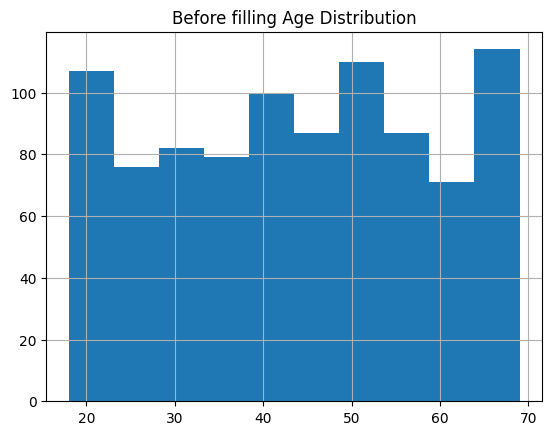

In [105]:
plt.figure()
df["age"].hist()
plt.title("Before filling Age Distribution")
plt.show()

the histogram does not depict a bell curve (normal distribution) as it lacks a distinct central peak and symmetrical tapering.

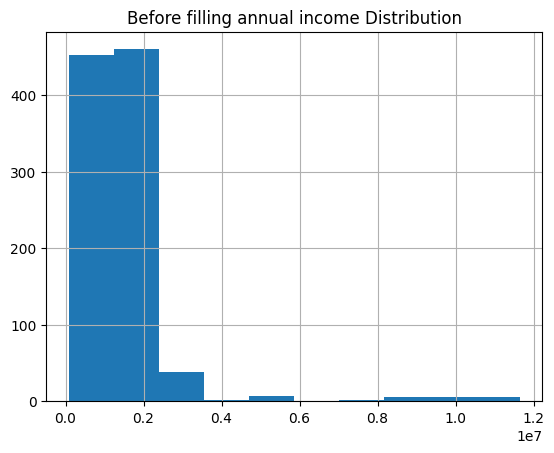

In [106]:
plt.figure()
df["annual_income"].hist()
plt.title("Before filling annual income Distribution")
plt.show()


these histograms do not show a normal distribution; the annual income charts are heavily right-skewed with a long tail, and the age distribution lacks a symmetrical, central bell curve.

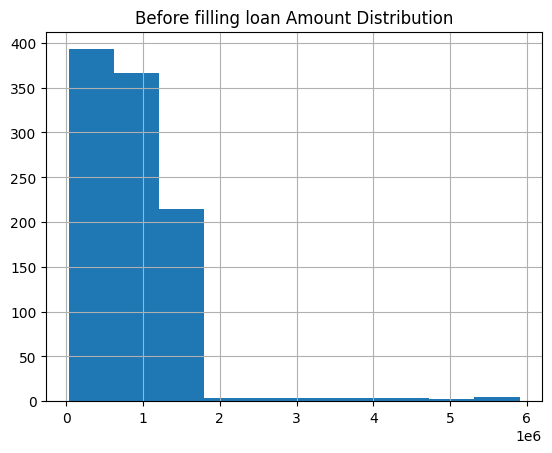

In [107]:
plt.figure()
df["loan_amount"].hist()
plt.title("Before filling loan Amount Distribution")
plt.show()

these histograms do not show a normal distribution; the loan amount charts are heavily right-skewed with a long tail, and the age distribution lacks a symmetrical, central bell curve.

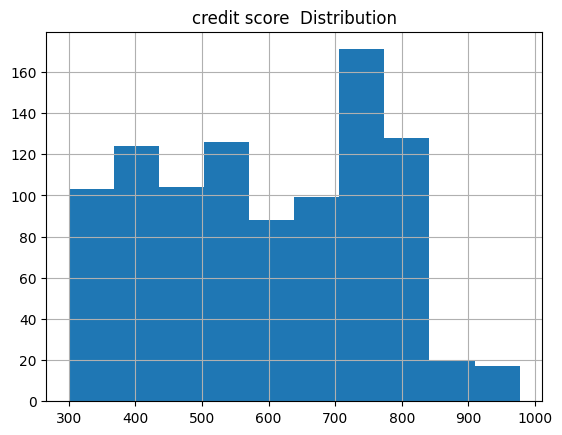

In [108]:

plt.figure()
df["credit_score"].hist()
plt.title("credit score  Distribution")
plt.show()

the histogram does not depict a bell curve (normal distribution) as it lacks a distinct central peak and symmetrical tapering.

## PART D : OUTLIERS HANDLING

## Z-SCORE OUTLIERS FOR ALL NUMERICAL COLUMNS

In [21]:
z_scores = np.abs(stats.zscore(df_mice[numerical_column], nan_policy="omit"))

# ===============================
# IDENTIFY OUTLIER ROWS
# ===============================
outliers = (z_scores > 3).any(axis=1)

print("Total Z-score outliers:", outliers.sum())

Total Z-score outliers: 47


identify the outliers with using z score method 

## OUTLIER COUNT PER COLUMN

In [22]:
outlier_count = pd.Series(
    (z_scores > 3).sum(axis=0),
    index=numerical_column
)

print("\nOutliers per numerical column:")
print(outlier_count)



Outliers per numerical column:
age                   0
annual_income        22
loan_amount          19
credit_score          0
repayment_history     6
transaction_count     0
spending_ratio        0
default_flag          0
dtype: int64


count of outliers for perticuler column wise

## REMOVE OUTLIERS

In [23]:
finaldfoutliers = df_mice.loc[~outliers]

print("Original shape:", df_mice.shape)
print("After removing Z-score outliers:", finaldfoutliers.shape)


Original shape: (1000, 23)
After removing Z-score outliers: (953, 23)


removes all the outliers from the dataset

## Before Vs After Graph(Z score)

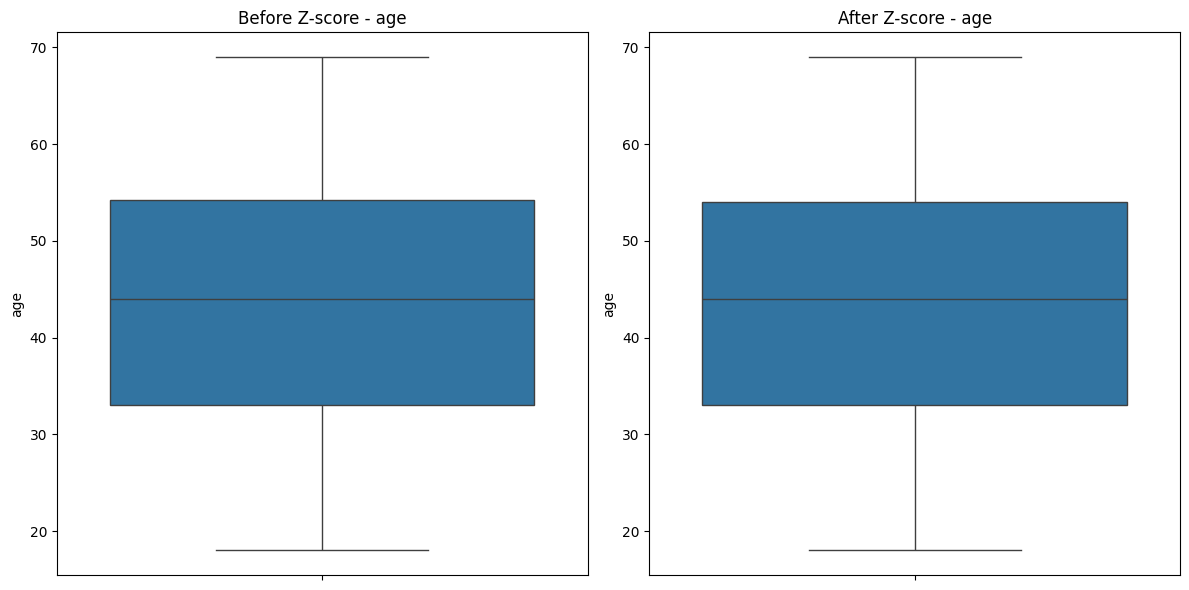

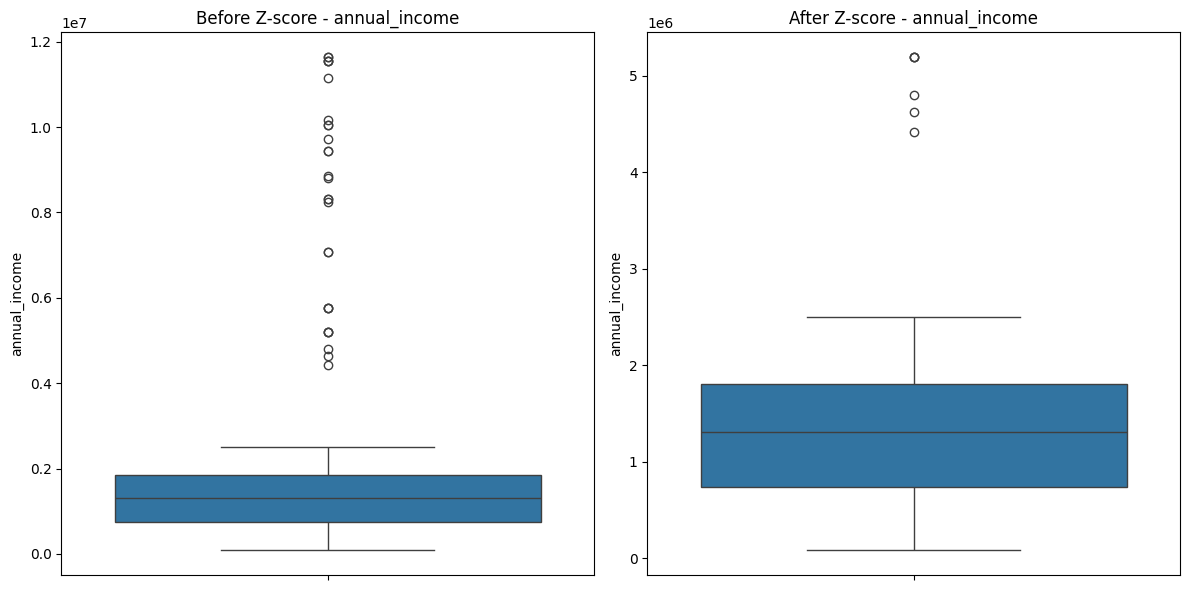

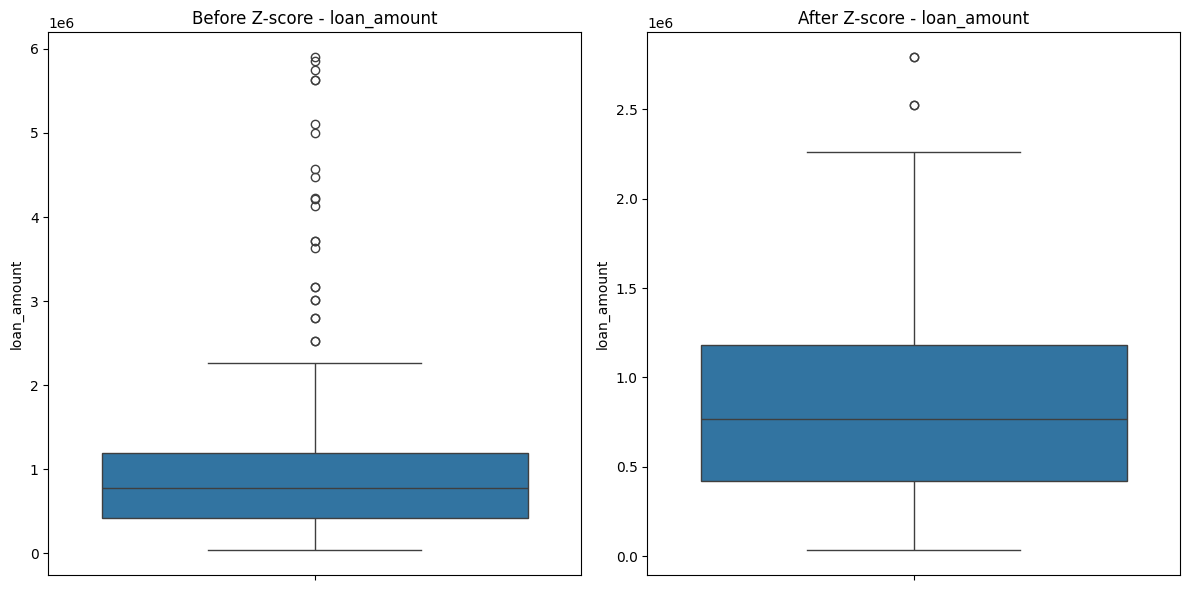

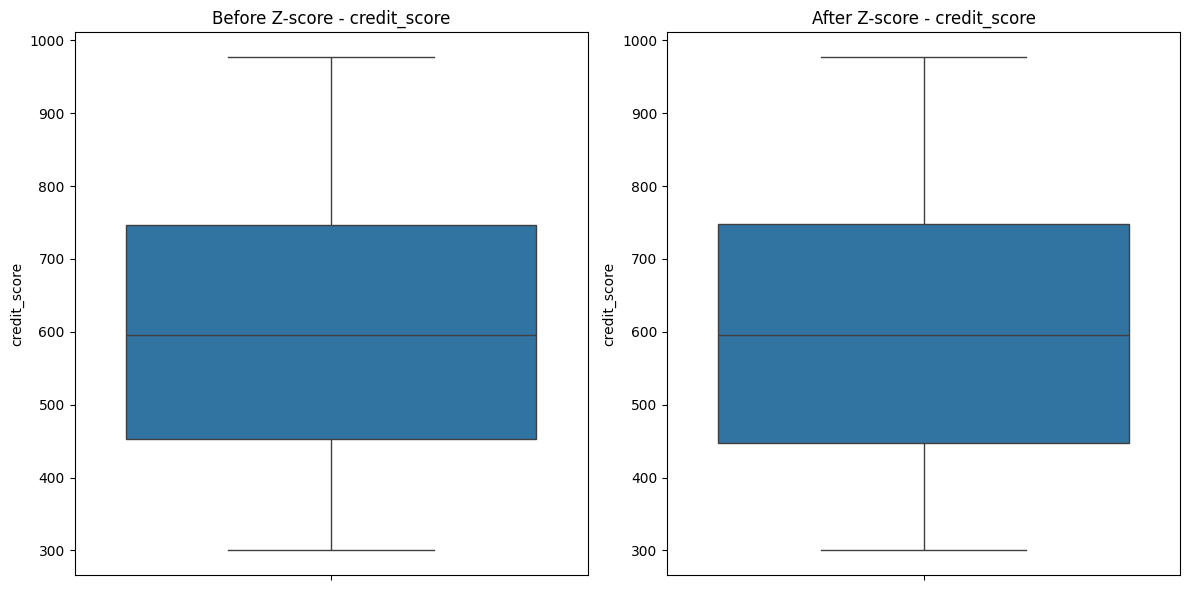

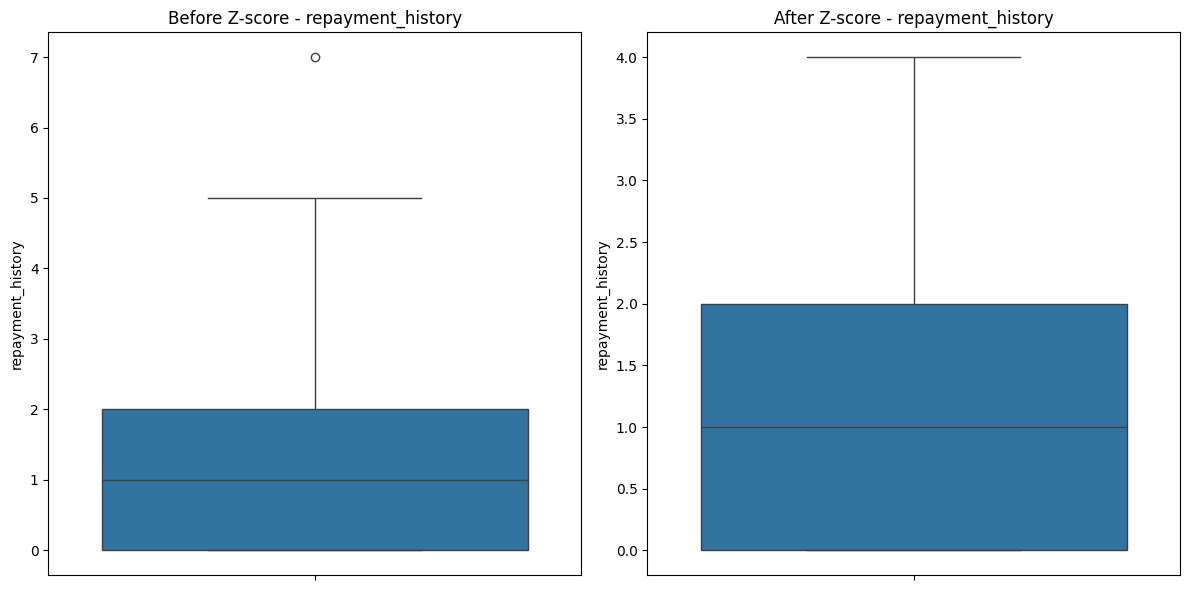

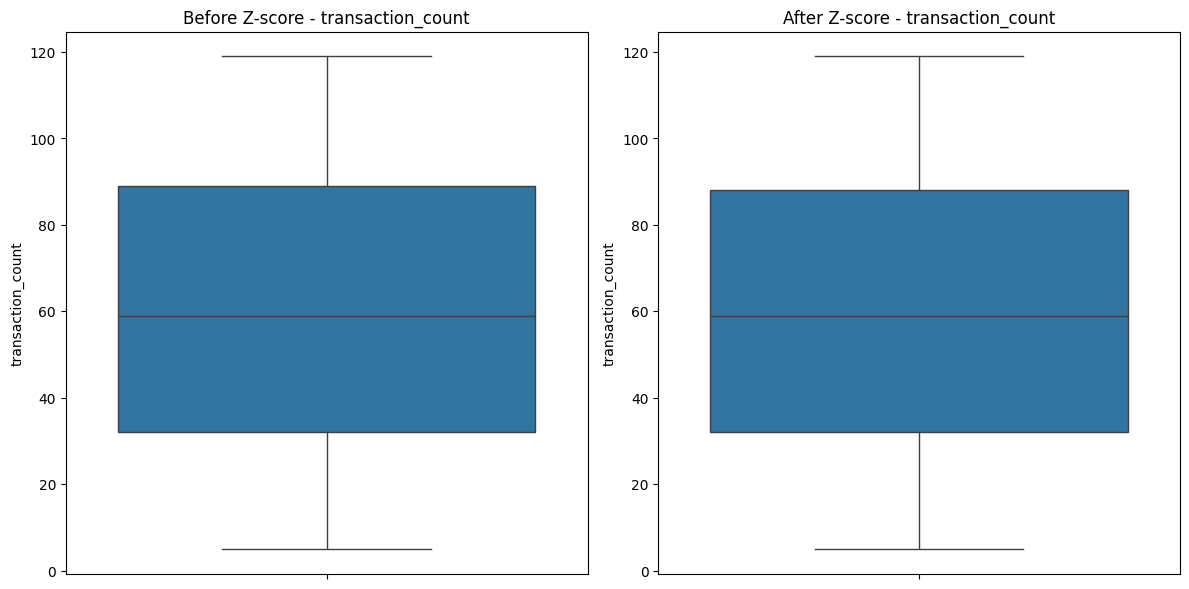

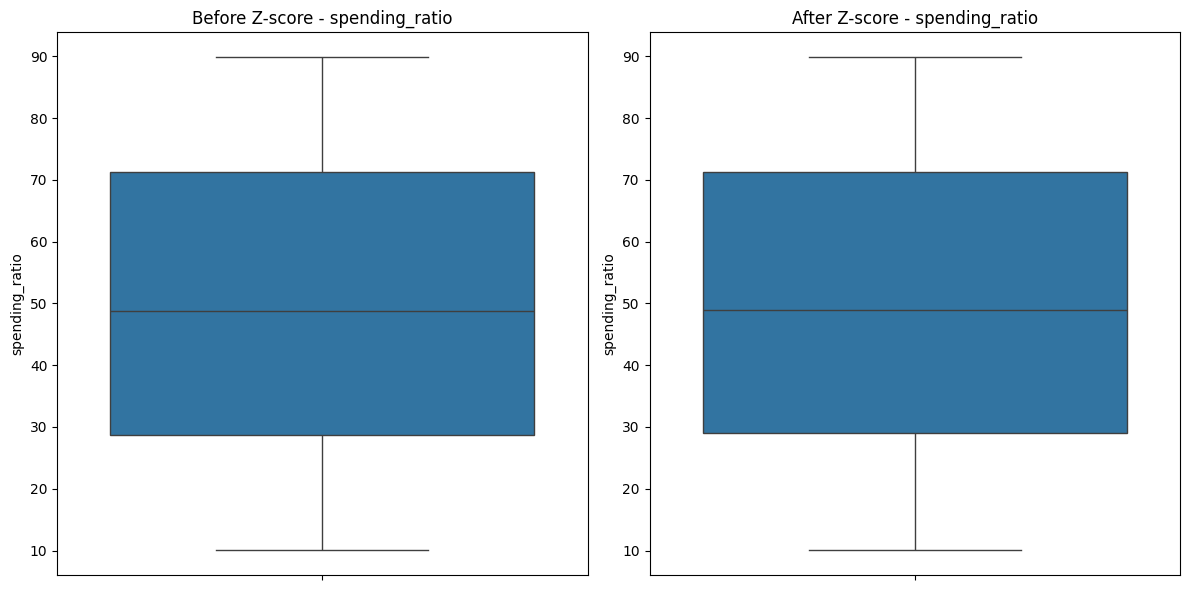

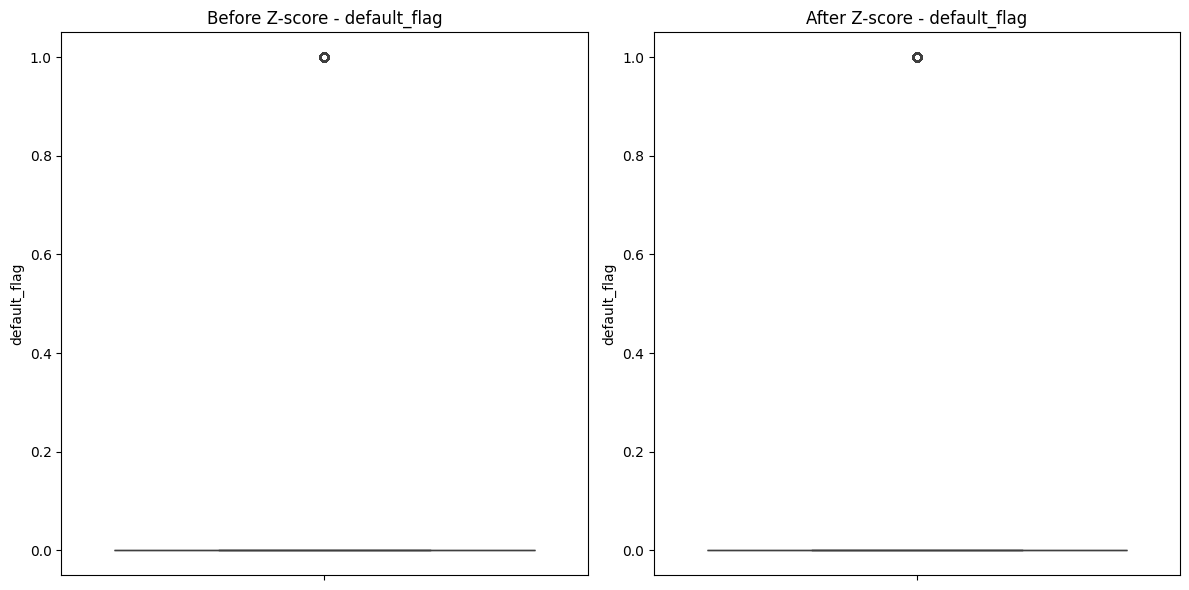

In [24]:


for col in numerical_column:
    
    plt.figure(figsize=(12,6))

    # BEFORE Z-score
    plt.subplot(1,2,1)
    sns.boxplot(y=df_mice[col])
    plt.title(f"Before Z-score - {col}")

    # AFTER Z-score
    plt.subplot(1,2,2)
    sns.boxplot(y=finaldfoutliers[col])
    plt.title(f"After Z-score - {col}")

    plt.tight_layout()
    plt.show()


in annual income and loan amount has some types of outliers and after applying z score some outliers removed.

## IQR OUTLIER DETECTION (AFTER Z-SCORE)

In [25]:
iqr_outliers = pd.Series(False, index=finaldfoutliers.index)

for col in numerical_column:
    Q1 = finaldfoutliers[col].quantile(0.25)
    Q3 = finaldfoutliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    iqr_outliers |= (
        (finaldfoutliers[col] < lower) |
        (finaldfoutliers[col] > upper)
    )

df_iqr = finaldfoutliers.loc[~iqr_outliers]

print("After IQR shape:", df_iqr.shape)


After IQR shape: (772, 23)


implementation of iqr for removing all the outliers.we can see in following graph


 ## Before Vs After Graph(IQR)

## 

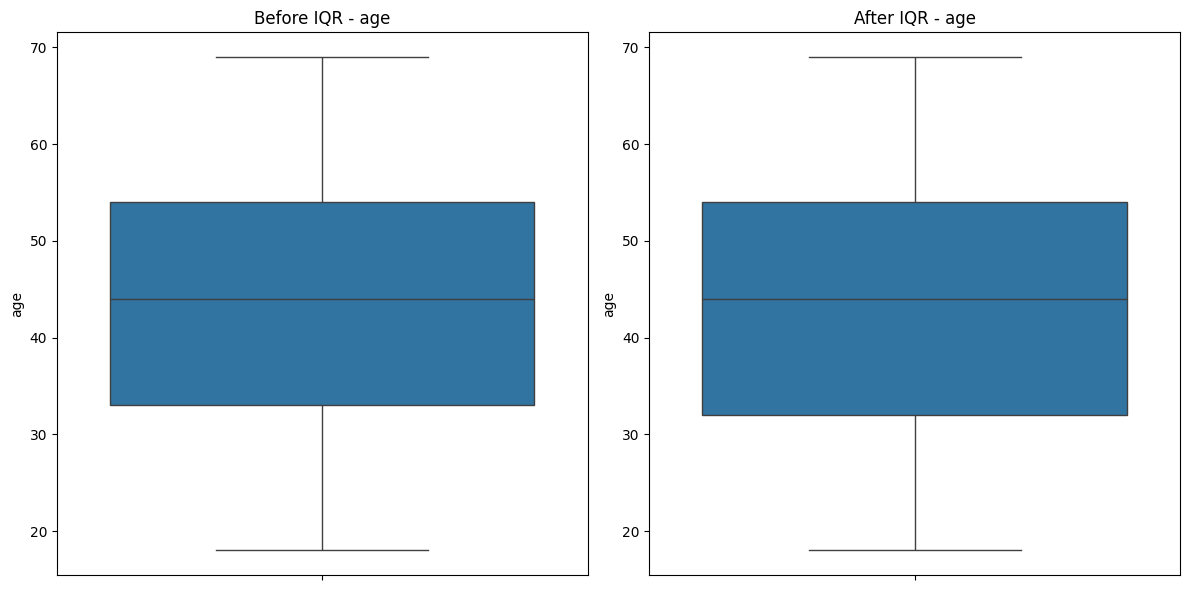

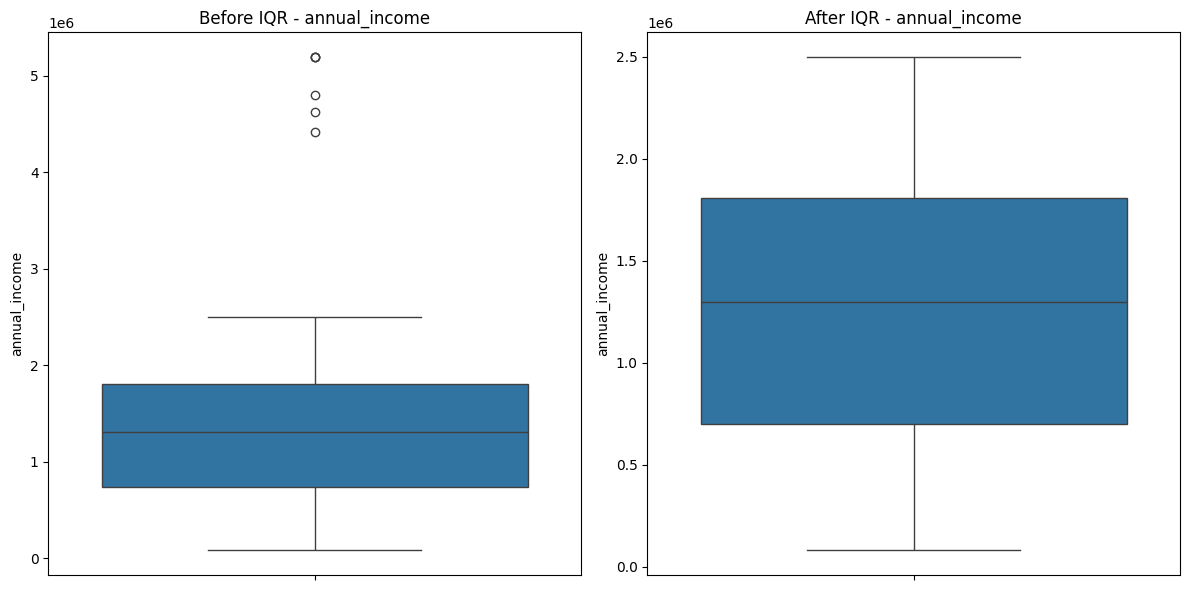

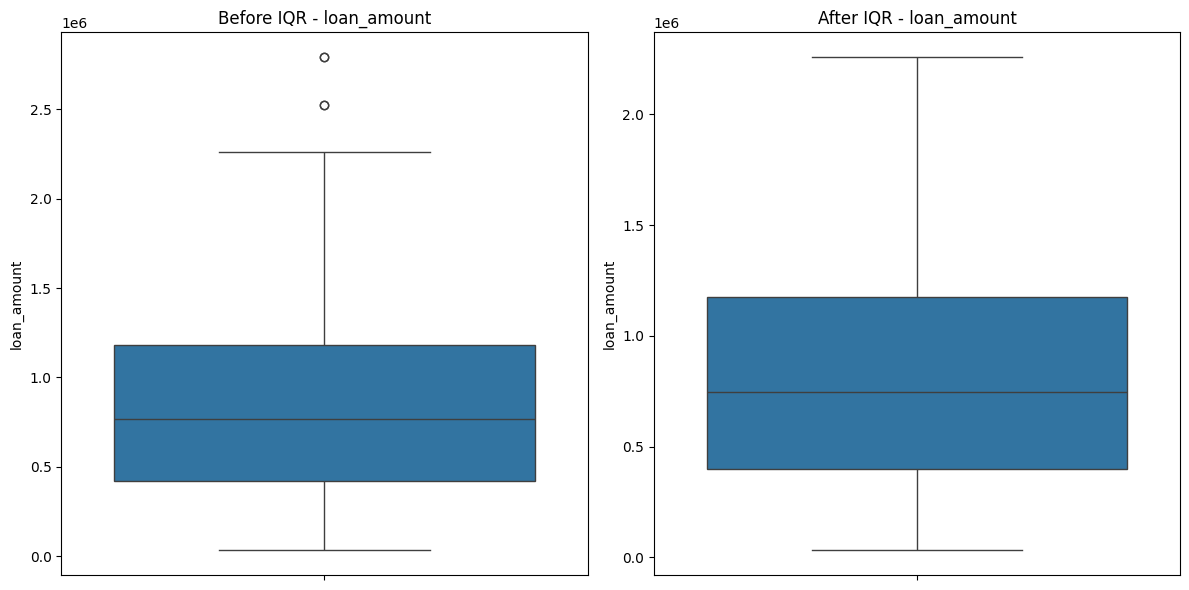

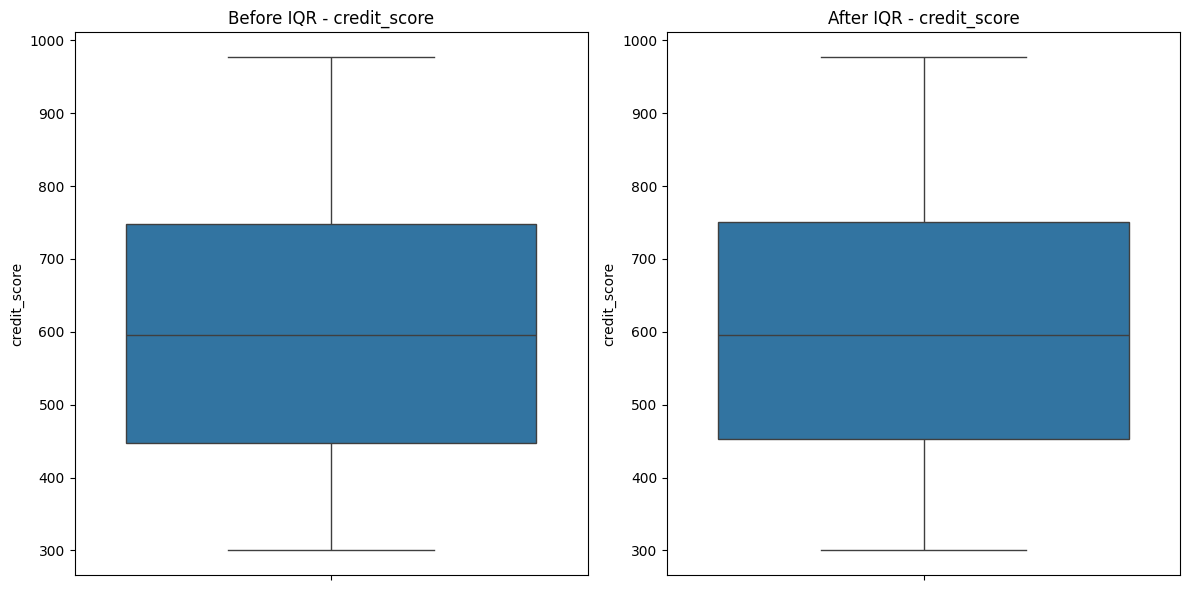

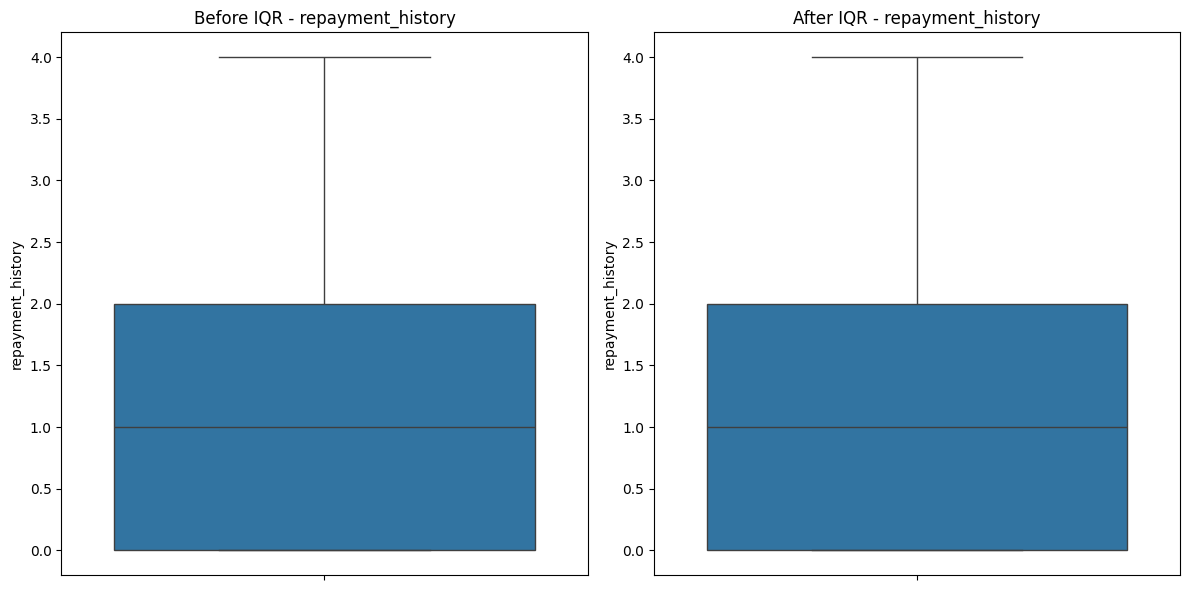

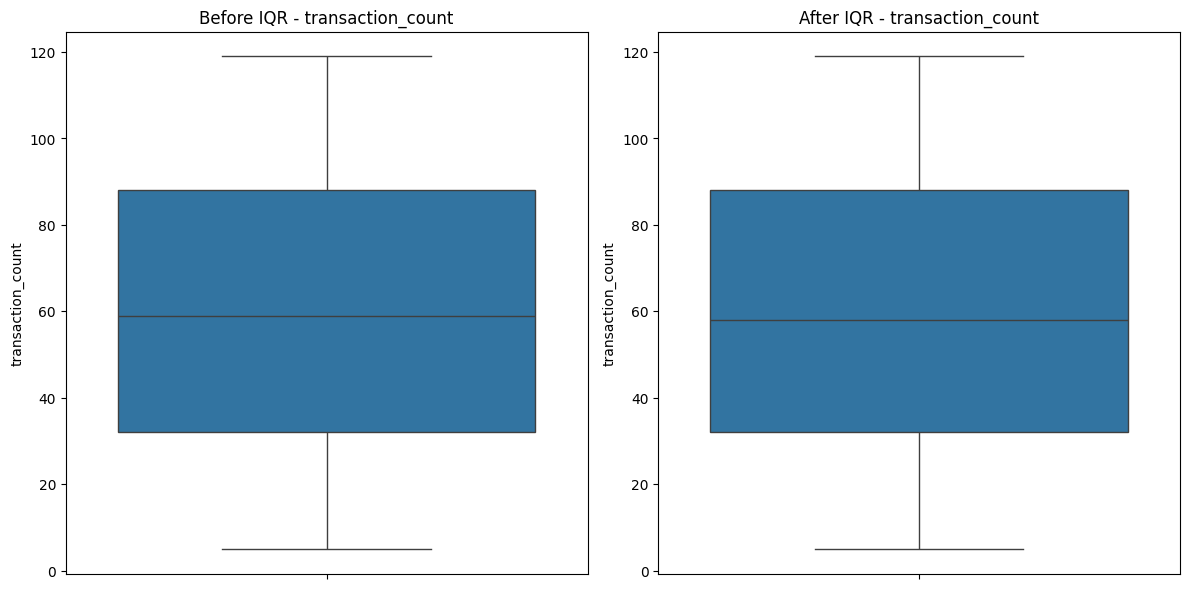

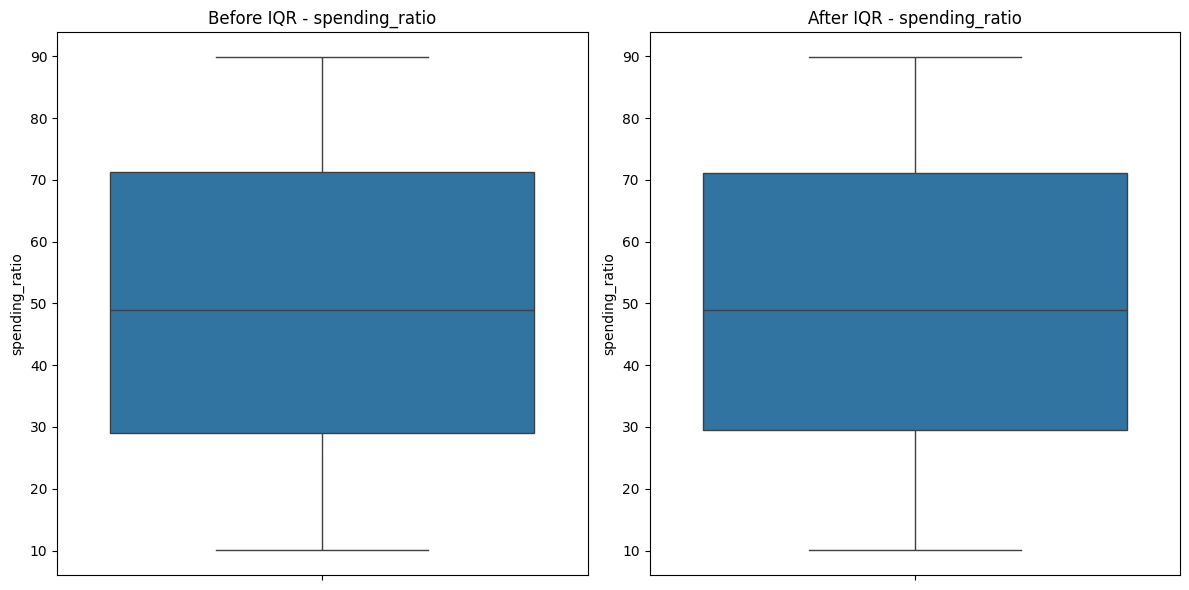

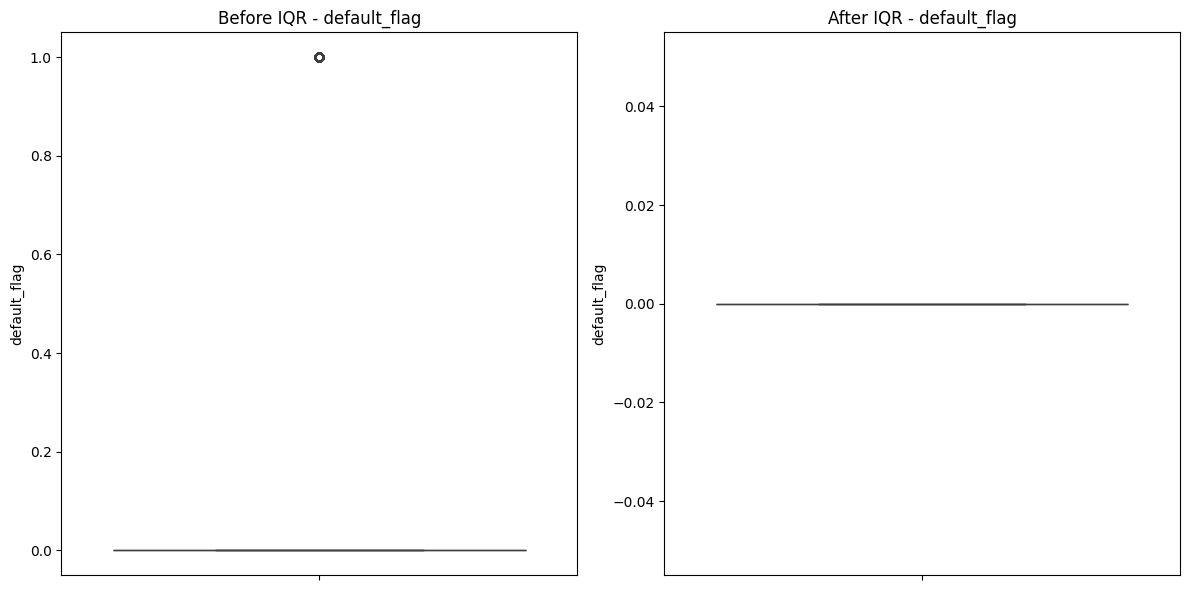

In [26]:
for col in numerical_column:
    
    plt.figure(figsize=(12,6))

    # BEFORE IQR (After Z-score)
    plt.subplot(1,2,1)
    sns.boxplot(y=finaldfoutliers[col])
    plt.title(f"Before IQR - {col}")

    # AFTER IQR
    plt.subplot(1,2,2)
    sns.boxplot(y=df_iqr[col])
    plt.title(f"After IQR - {col}")

    plt.tight_layout()
    plt.show()


with using iqr most of all the outliers are removed

## PERCENTILE LIMITS

In [27]:
lower_percentile = 0.01
upper_percentile = 0.99


defined lower and upper limit

## IDENTIFY PERCENTILE OUTLIERS

In [28]:
percentile_outliers = pd.Series(False, index=df_iqr.index)

for col in numerical_column:
    
    lower = df_iqr[col].quantile(lower_percentile)
    upper = df_iqr[col].quantile(upper_percentile)
    
    percentile_outliers |= (
        (df_iqr[col] < lower) |
        (df_iqr[col] > upper)
    )

print("Total Percentile outliers:", percentile_outliers.sum())


Total Percentile outliers: 70


identify the outliers with upper and lower limit

## REMOVE PERCENTILE OUTLIERS

In [29]:
df_percentile = df_iqr.loc[~percentile_outliers]

print("Shape after IQR:", df_iqr.shape)
print("Shape after Percentile:", df_percentile.shape)


Shape after IQR: (772, 23)
Shape after Percentile: (702, 23)


removed all the outliers with using percentiles methods

 ## Before Vs After Graph(PERCENTILES)

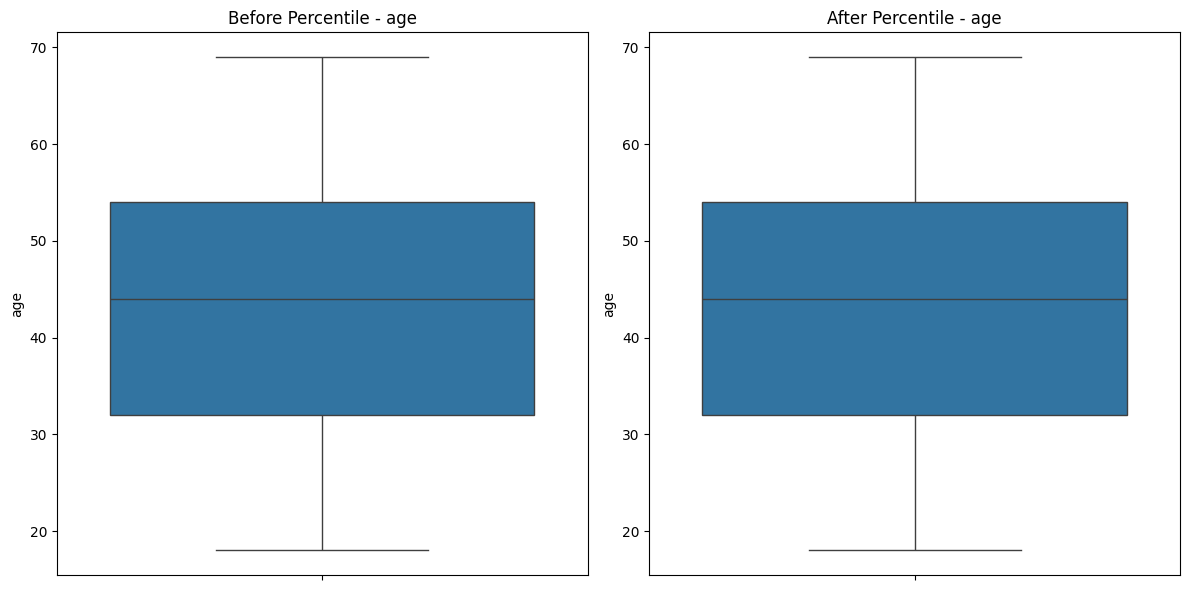

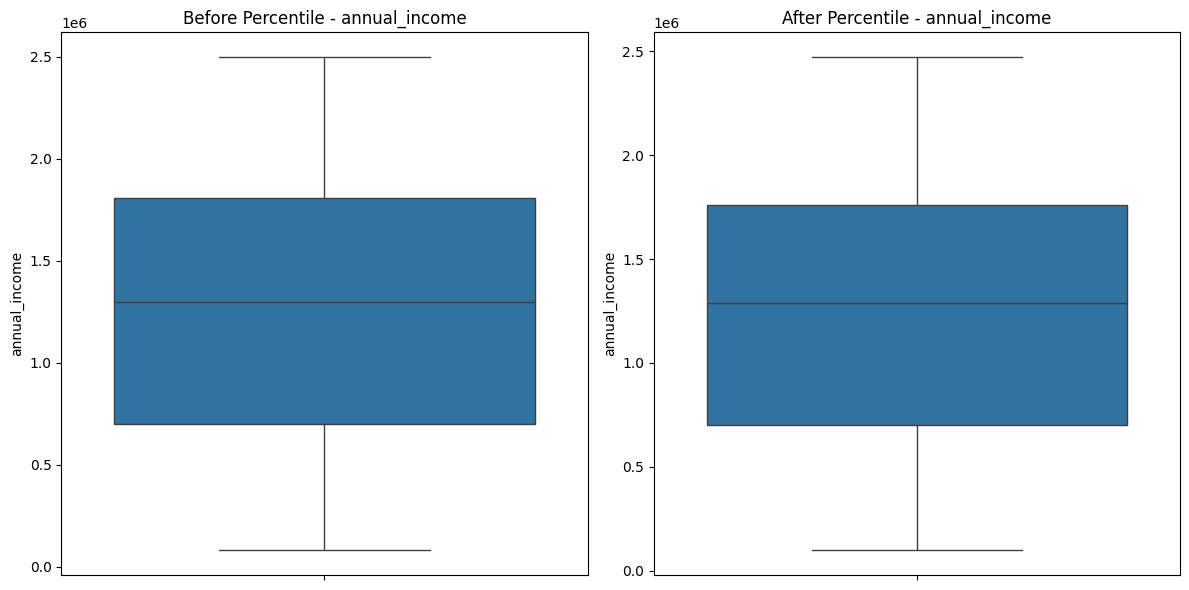

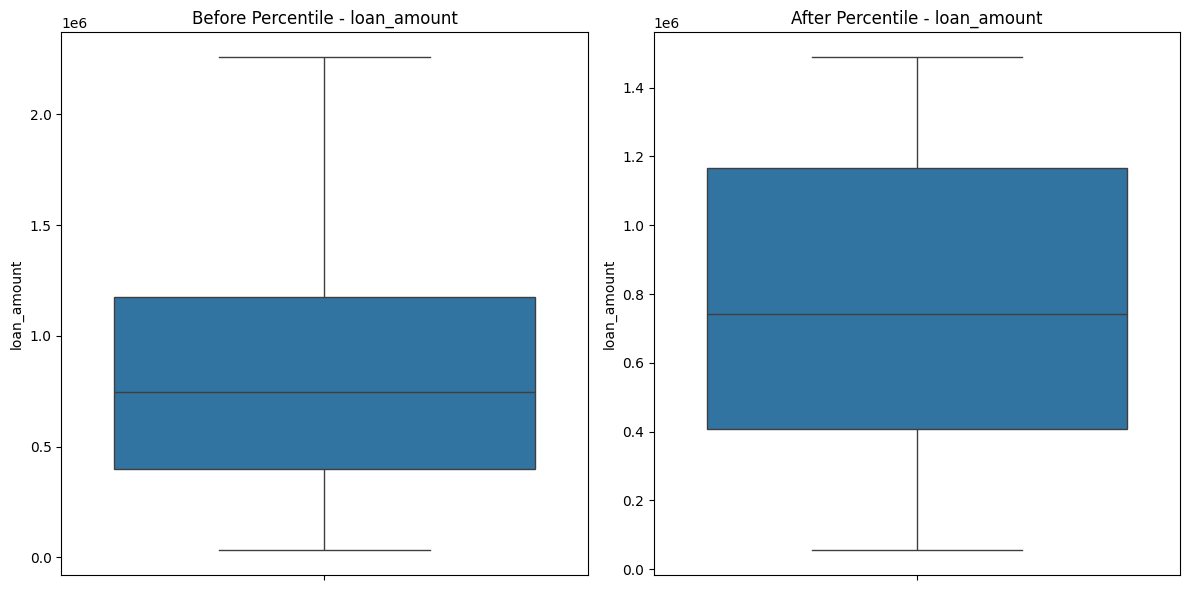

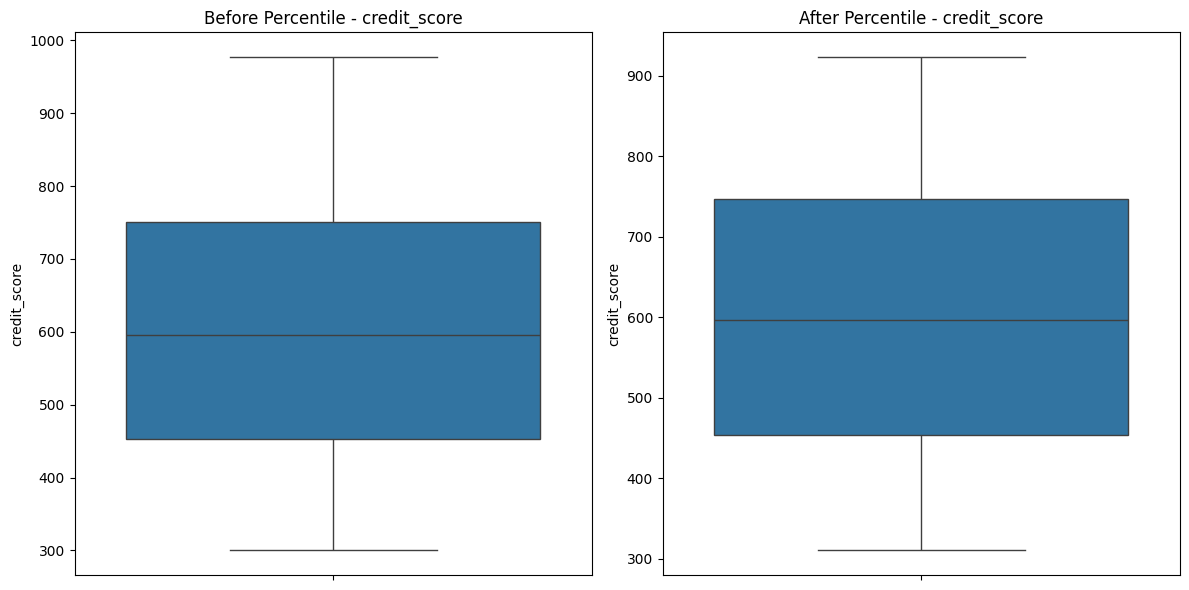

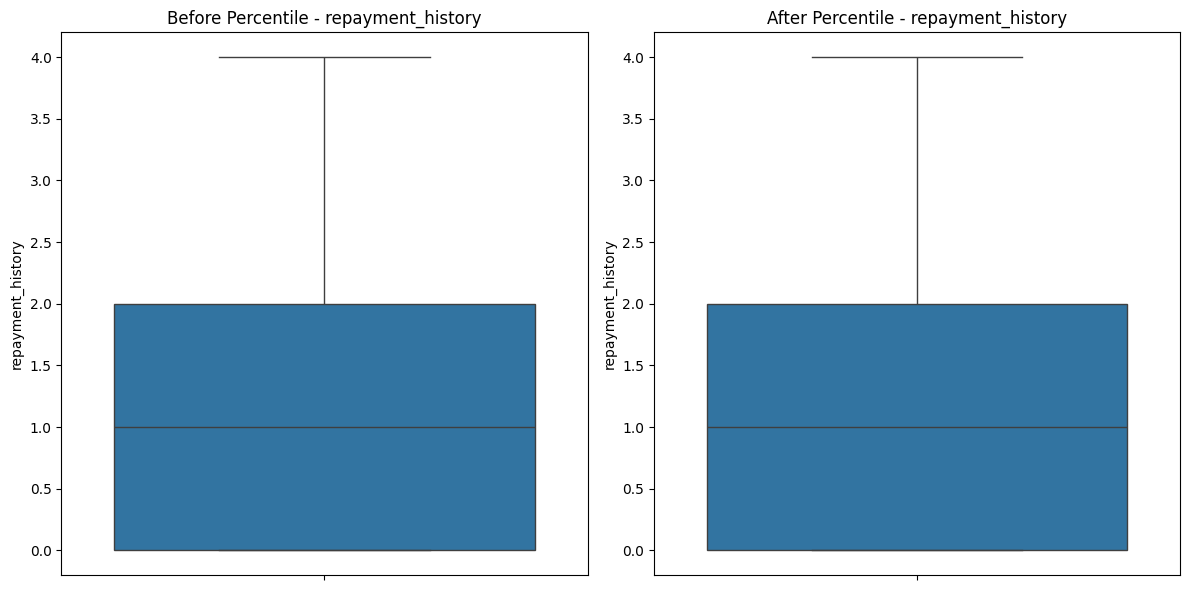

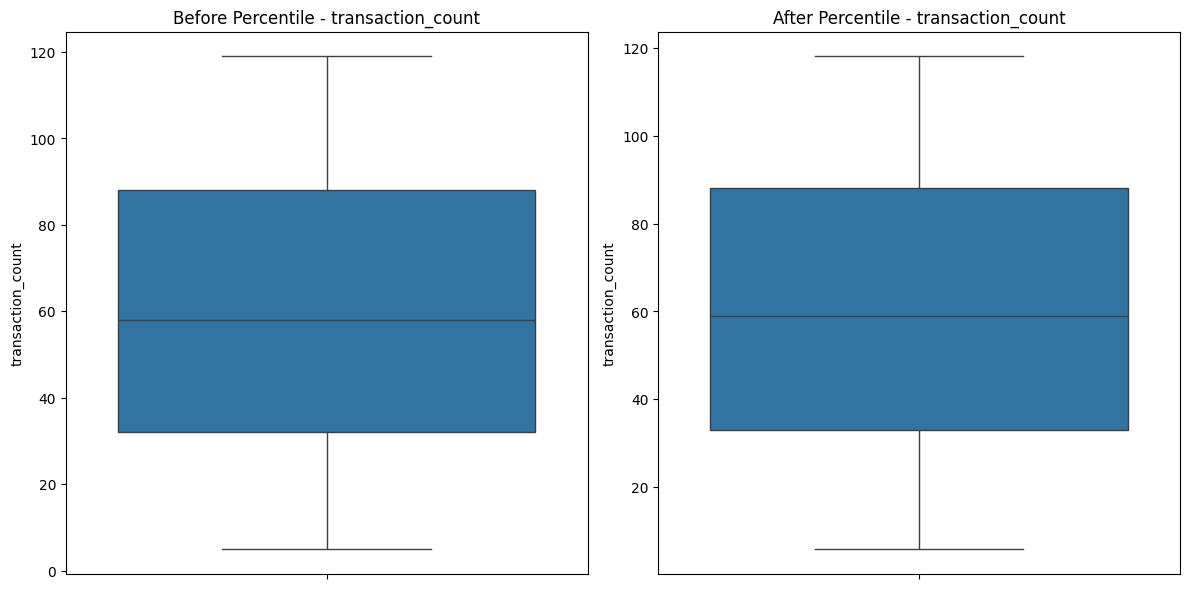

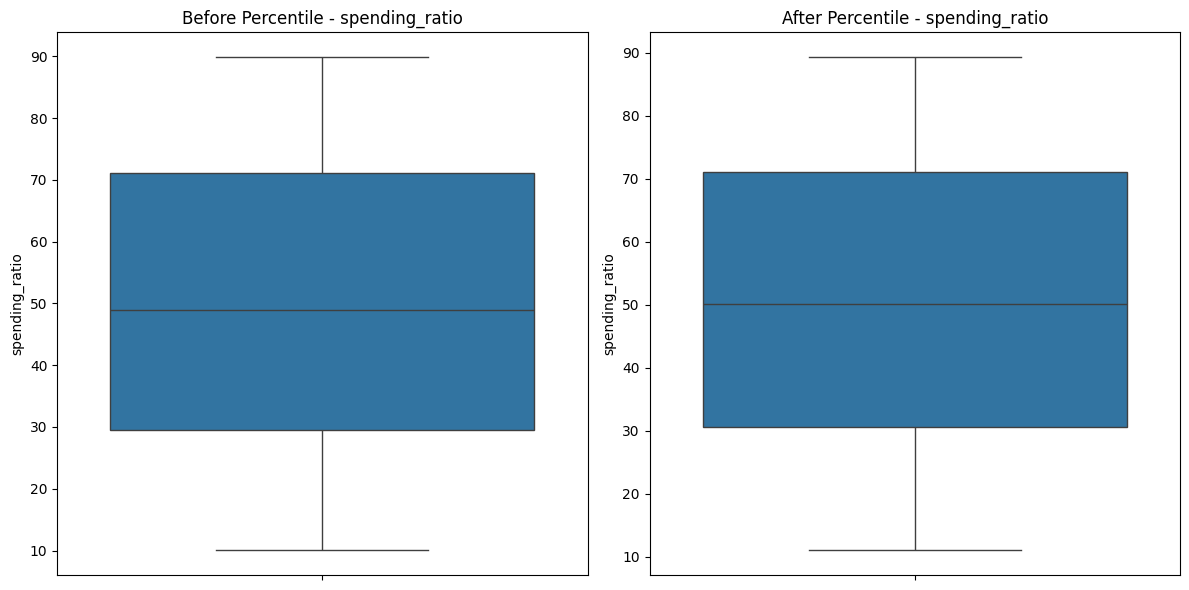

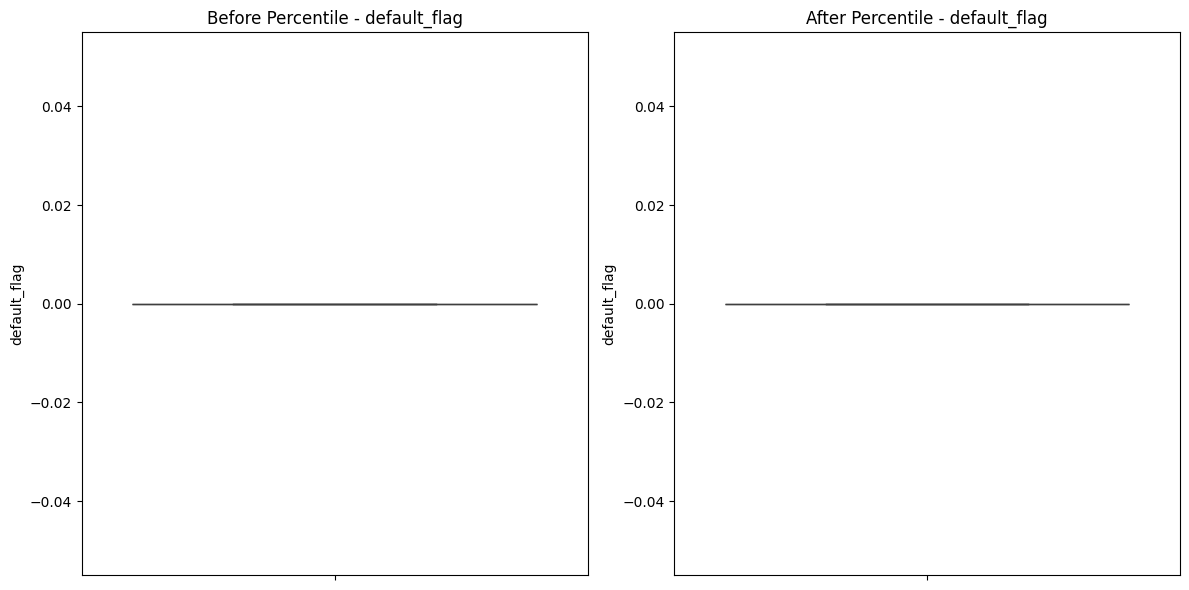

In [30]:


for col in numerical_column:
    
    plt.figure(figsize=(12,6))

    # BEFORE Percentile (After IQR)
    plt.subplot(1,2,1)
    sns.boxplot(y=df_iqr[col])
    plt.title(f"Before Percentile - {col}")

    # AFTER Percentile
    plt.subplot(1,2,2)
    sns.boxplot(y=df_percentile[col])
    plt.title(f"After Percentile - {col}")

    plt.tight_layout()
    plt.show()


## COPY DATA FOR WINSORIZATION

In [31]:
df_winsor = df_iqr.copy()


create copy of WINSORIZATION

## APPLY WINSORIZATION (ALL NUMERICAL COLUMNS)

In [32]:
for col in numerical_column:
    
    df_winsor[col] = winsorize(
        df_winsor[col],
        limits=[0.01, 0.01]   # 1% lower & 1% upper
    )


apply the WINSORIZATION with same lower and upper limit

## VERIFY SHAPE

In [33]:
print("Before Winsorization shape:", df_iqr.shape)
print("After Winsorization shape:", df_winsor.shape)


Before Winsorization shape: (772, 23)
After Winsorization shape: (772, 23)


replace with lower and upper limit not removed the outliers in WINSORIZATION

 ## Before Vs After Graph(WINSORIZATION)

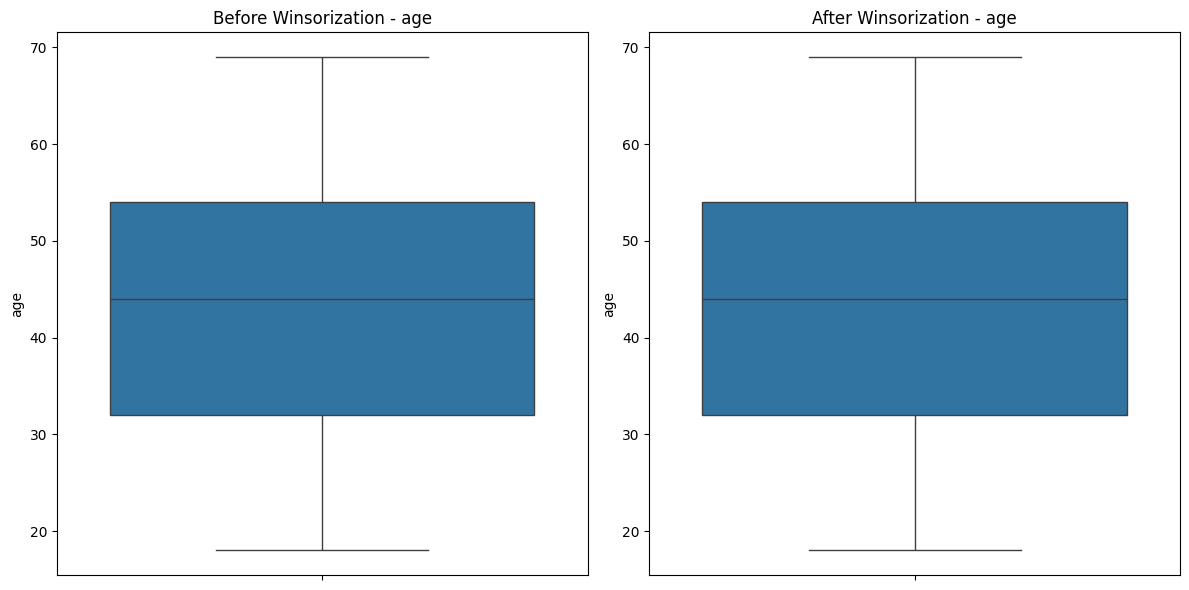

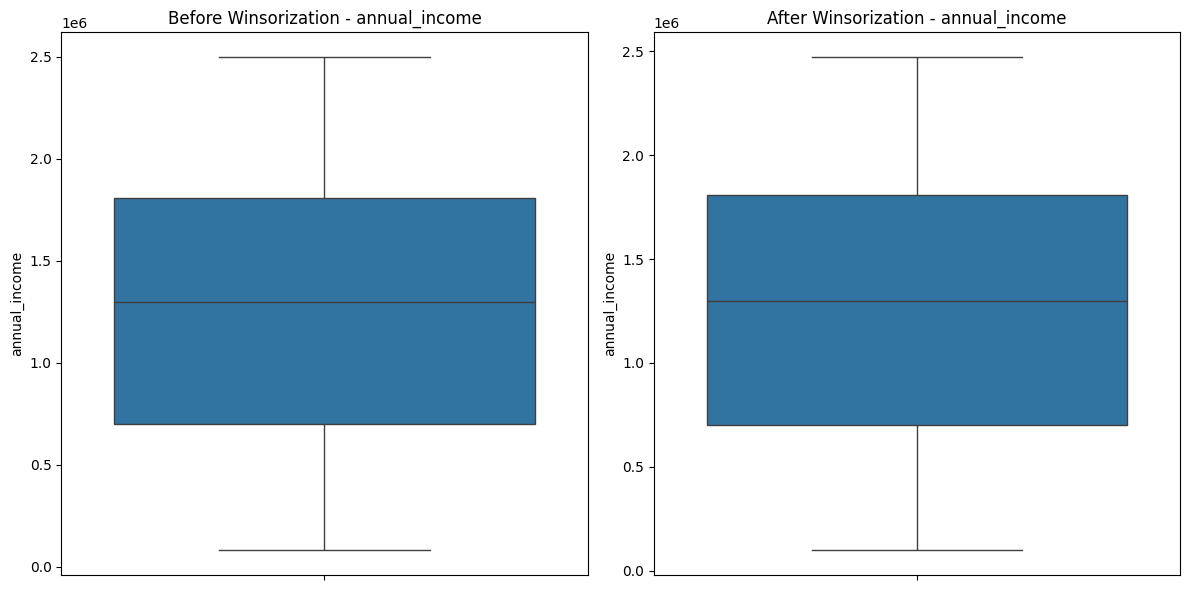

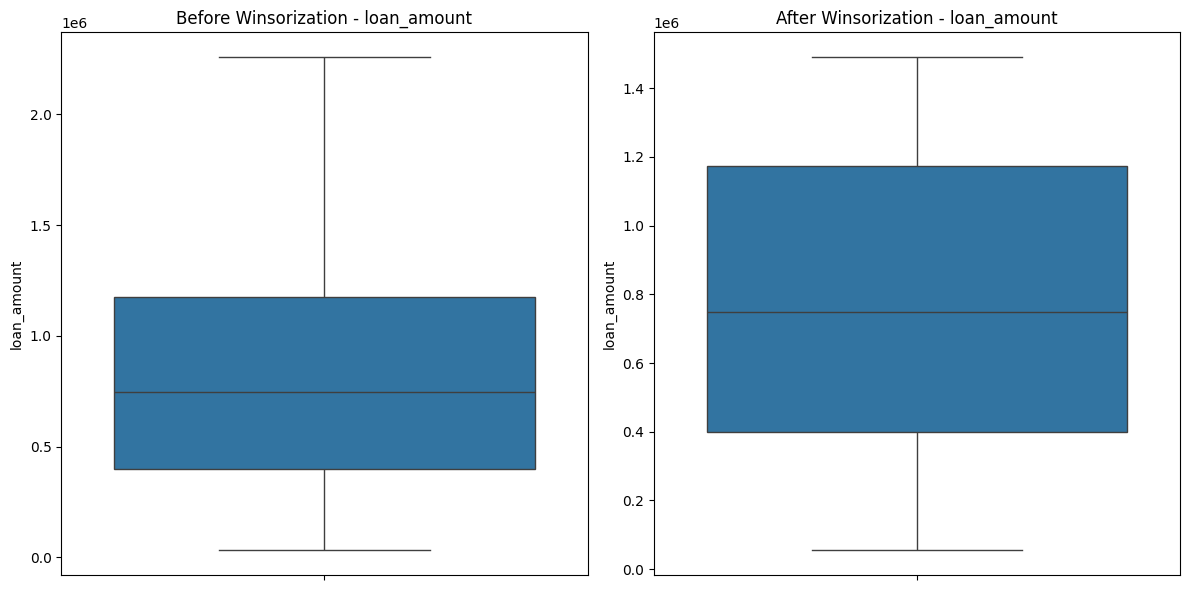

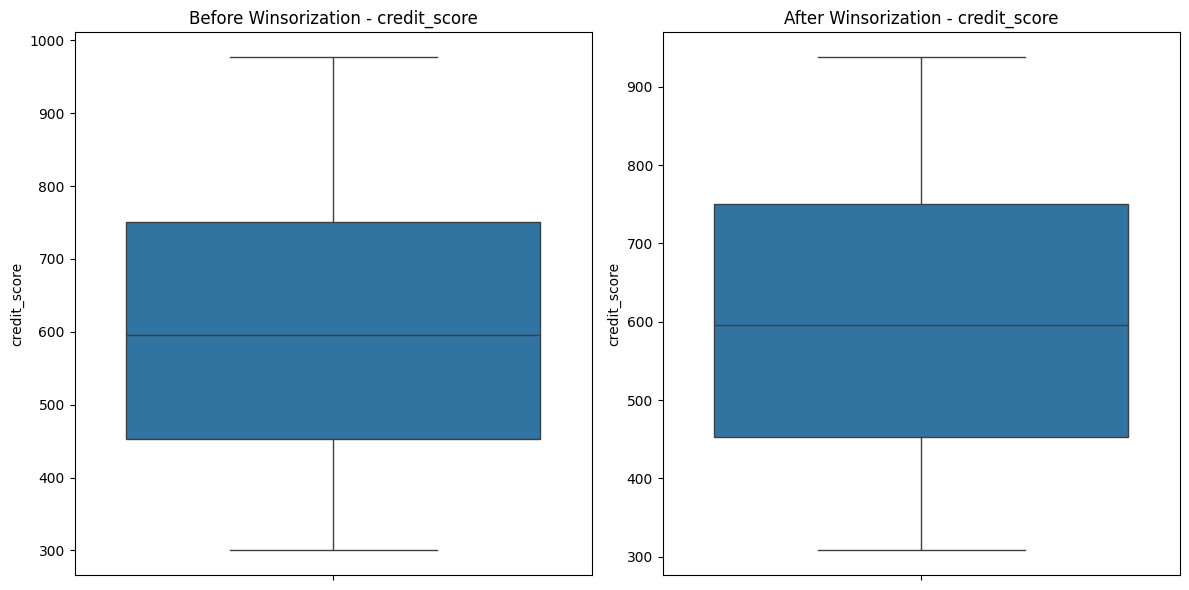

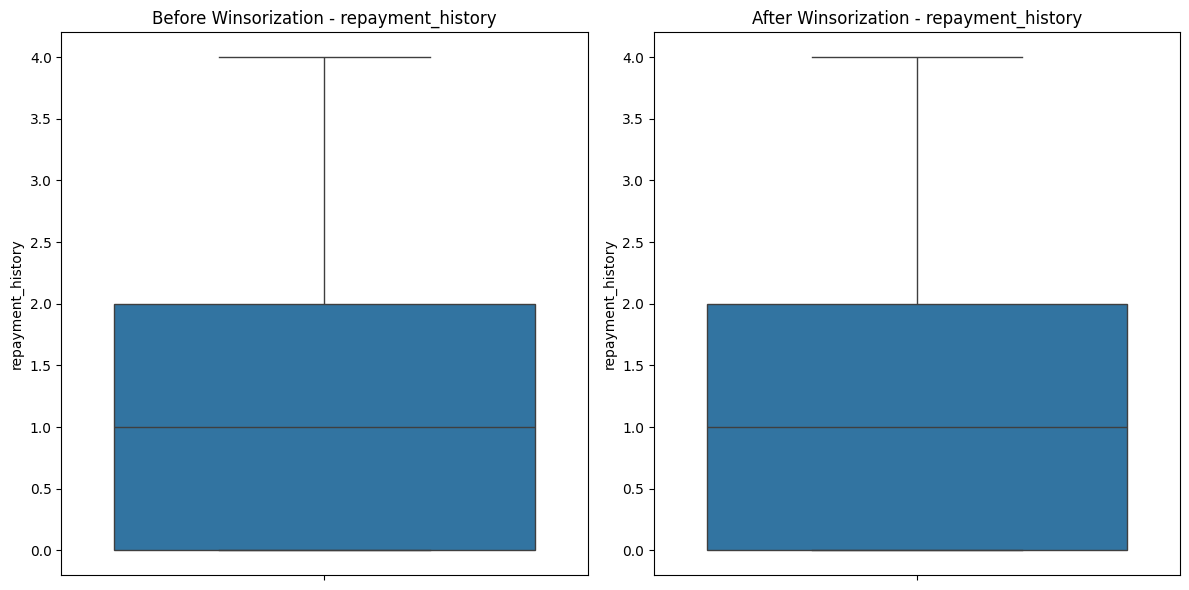

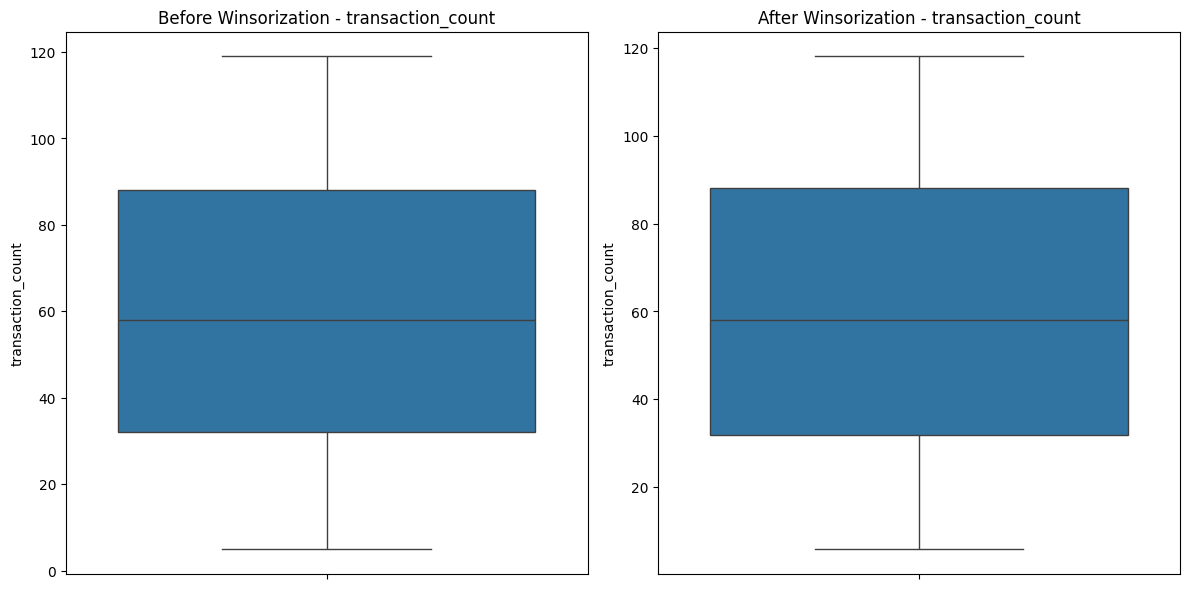

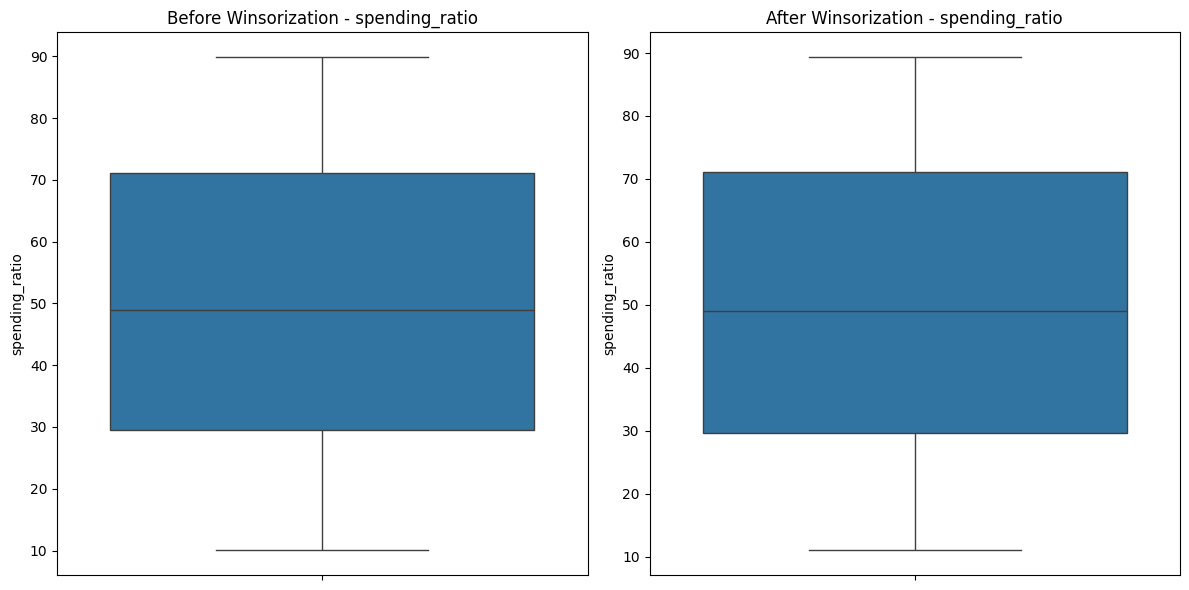

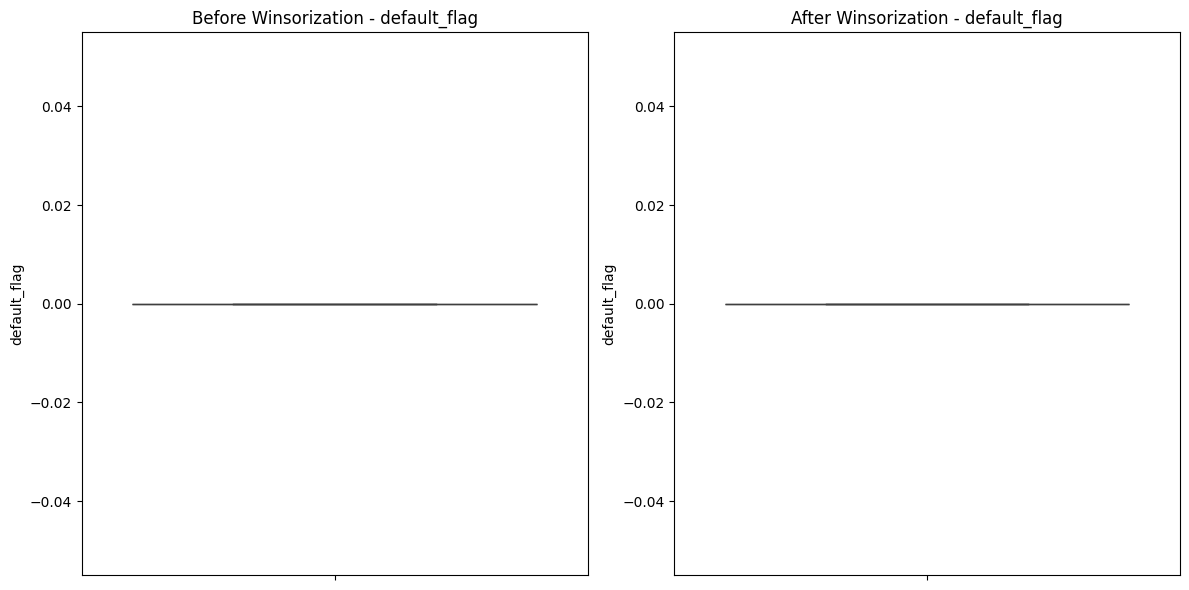

In [34]:
for col in numerical_column:
    
    plt.figure(figsize=(12,6))

    # BEFORE
    plt.subplot(1,2,1)
    sns.boxplot(y=df_iqr[col])
    plt.title(f"Before Winsorization - {col}")

    # AFTER
    plt.subplot(1,2,2)
    sns.boxplot(y=df_winsor[col])
    plt.title(f"After Winsorization - {col}")

    plt.tight_layout()
    plt.show()

## PART E : FEATURE ENGINEERING

## HANDLE DATE & TIME VARIABLES

In [35]:
df_fe = df_winsor.copy()

df_fe["join_date"] = pd.to_datetime(df_fe["join_date"])

df_fe["join_year"] = df_fe["join_date"].dt.year
df_fe["join_month"] = df_fe["join_date"].dt.month
df_fe["join_day"] = df_fe["join_date"].dt.day
df_fe["join_weekday"] = df_fe["join_date"].dt.weekday

# Optional: drop original date
df_fe.drop(columns=["join_date"], inplace=True)
df_fe.head()


,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,...,loan_amount_missing,credit_score_missing,repayment_history_missing,transaction_count_missing,spending_ratio_missing,default_flag_missing,join_year,join_month,join_day,join_weekday
1,CUST1001,69.0,Male,North,Post-Graduate,Self-Employed,655425.0,579308.0,Business,635.0,...,0,0,0,0,0,0,2020,8,16,6
2,CUST1002,46.0,Female,South,Graduate,Self-Employed,227032.0,166149.0,Business,512.0,...,0,0,0,0,0,0,2021,4,21,2
4,CUST1004,60.0,Male,South,Primary,Salaried,512206.0,303958.0,Home,443.0,...,0,0,0,0,0,0,2024,8,19,0
5,CUST1005,25.0,Male,West,Graduate,Salaried,314318.0,303497.0,Car,339.0,...,0,0,0,0,0,0,2018,12,16,6
6,CUST1006,38.0,Male,East,Graduate,Self-Employed,2260943.0,407218.0,Car,308.0,...,0,0,0,0,0,0,2016,4,21,3


from the date column fetch year,month,date,etc;

## ORDINAL ENCODING (Education Level)

In [36]:
education_order = [
    ["Primary", "Secondary", "Graduate", "Post-Graduate"]
]

ordinal_encoder = OrdinalEncoder(categories=education_order)

df_fe["education_level_encoded"] = ordinal_encoder.fit_transform(
    df_fe[["education_level"]]
)
df_fe.head()


,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,...,credit_score_missing,repayment_history_missing,transaction_count_missing,spending_ratio_missing,default_flag_missing,join_year,join_month,join_day,join_weekday,education_level_encoded
1,CUST1001,69.0,Male,North,Post-Graduate,Self-Employed,655425.0,579308.0,Business,635.0,...,0,0,0,0,0,2020,8,16,6,3.0
2,CUST1002,46.0,Female,South,Graduate,Self-Employed,227032.0,166149.0,Business,512.0,...,0,0,0,0,0,2021,4,21,2,2.0
4,CUST1004,60.0,Male,South,Primary,Salaried,512206.0,303958.0,Home,443.0,...,0,0,0,0,0,2024,8,19,0,0.0
5,CUST1005,25.0,Male,West,Graduate,Salaried,314318.0,303497.0,Car,339.0,...,0,0,0,0,0,2018,12,16,6,2.0
6,CUST1006,38.0,Male,East,Graduate,Self-Employed,2260943.0,407218.0,Car,308.0,...,0,0,0,0,0,2016,4,21,3,2.0


apply the ordinal encoding in education level

## LABEL ENCODING (Binary Variables)

In [37]:

label_encoder = LabelEncoder()

df_fe["gender_encoded"] = label_encoder.fit_transform(df_fe["gender"])
df_fe["default_flag"] = label_encoder.fit_transform(df_fe["default_flag"])
df_fe.head()


,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,...,repayment_history_missing,transaction_count_missing,spending_ratio_missing,default_flag_missing,join_year,join_month,join_day,join_weekday,education_level_encoded,gender_encoded
1,CUST1001,69.0,Male,North,Post-Graduate,Self-Employed,655425.0,579308.0,Business,635.0,...,0,0,0,0,2020,8,16,6,3.0,1
2,CUST1002,46.0,Female,South,Graduate,Self-Employed,227032.0,166149.0,Business,512.0,...,0,0,0,0,2021,4,21,2,2.0,0
4,CUST1004,60.0,Male,South,Primary,Salaried,512206.0,303958.0,Home,443.0,...,0,0,0,0,2024,8,19,0,0.0,1
5,CUST1005,25.0,Male,West,Graduate,Salaried,314318.0,303497.0,Car,339.0,...,0,0,0,0,2018,12,16,6,2.0,1
6,CUST1006,38.0,Male,East,Graduate,Self-Employed,2260943.0,407218.0,Car,308.0,...,0,0,0,0,2016,4,21,3,2.0,1


 Label Encoding is correct ONLY for binary features

## ONE-HOT ENCODING (Nominal Categories)

In [38]:
df_fe = pd.get_dummies(
    df_fe,
    columns=["region", "loan_purpose"],
    drop_first=True
)
df_fe.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,join_weekday,education_level_encoded,gender_encoded,region_North,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,6,3.0,1,True,False,False,False,False,False,False
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,2,2.0,0,False,True,False,False,False,False,False
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,0,0.0,1,False,True,False,False,False,True,False
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,6,2.0,1,False,False,True,True,False,False,False
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,3,2.0,1,False,False,False,True,False,False,False


## NUMERICAL FEATURE ENGINEERING (BINNING)

## Equal-Width Binning (Annual Income)

In [39]:
df_fe["income_bin"] = pd.cut(
    df_fe["annual_income"],
    bins=4,
    labels=["Low", "Medium", "High", "Very High"]
)
df_fe.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,education_level_encoded,gender_encoded,region_North,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,3.0,1,True,False,False,False,False,False,False,Low
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,2.0,0,False,True,False,False,False,False,False,Low
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,0.0,1,False,True,False,False,False,True,False,Low
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,2.0,1,False,False,True,True,False,False,False,Low
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,2.0,1,False,False,False,True,False,False,False,Very High


## Binarization (Threshold Flag)

In [40]:
df_fe["high_income_flag"] = (df_fe["annual_income"] > 500000).astype(int)
df_fe.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,gender_encoded,region_North,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,1,True,False,False,False,False,False,False,Low,1
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,0,False,True,False,False,False,False,False,Low,0
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,1,False,True,False,False,False,True,False,Low,1
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,1,False,False,True,True,False,False,False,Low,0
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,1,False,False,False,True,False,False,False,Very High,1


## Quantile Binning (Transaction Count)

In [41]:
df_fe["transaction_quantile"] = pd.qcut(
    df_fe["transaction_count"],
    q=4,
    labels=["Q1", "Q2", "Q3", "Q4"]
)
df_fe.head()


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_North,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,True,False,False,False,False,False,False,Low,1,Q1
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,False,True,False,False,False,False,False,Low,0,Q4
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,False,True,False,False,False,True,False,Low,1,Q2
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,False,False,True,True,False,False,False,Low,0,Q3
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,False,False,False,True,False,False,False,Very High,1,Q4


## K-Means Binning (Income Clustering)

In [42]:

kmeans = KMeans(n_clusters=4, random_state=42)

df_fe["income_kmeans_bin"] = kmeans.fit_predict(
    df_fe[["annual_income"]]
)
df_fe.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,False,False,False,False,False,False,Low,1,Q1,0
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,True,False,False,False,False,False,Low,0,Q4,0
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,True,False,False,False,True,False,Low,1,Q2,0
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,False,True,True,False,False,False,Low,0,Q3,0
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,False,False,True,False,False,False,Very High,1,Q4,2


## PART F : FEATURE SCALING

## NUMERICAL COLUMNS

In [43]:
numerical_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols


['age',
 'annual_income',
 'loan_amount',
 'credit_score',
 'repayment_history',
 'transaction_count',
 'spending_ratio',
 'default_flag',
 'age_missing',
 'annual_income_missing',
 'loan_amount_missing',
 'credit_score_missing',
 'repayment_history_missing',
 'transaction_count_missing',
 'spending_ratio_missing',
 'default_flag_missing',
 'join_year',
 'join_month',
 'join_day',
 'join_weekday',
 'education_level_encoded',
 'gender_encoded',
 'high_income_flag',
 'income_kmeans_bin']

## STANDARDIZATION (Z-SCORE SCALING)

In [44]:
from sklearn.preprocessing import StandardScaler


In [45]:
scaler_standard = StandardScaler()

df_standard = df_fe.copy()
df_standard[numerical_cols] = scaler_standard.fit_transform(df_fe[numerical_cols])

df_standard.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.786804,Male,Post-Graduate,Self-Employed,-0.931186,-0.437644,0.218869,-0.134634,-1.274498,...,False,False,False,False,False,False,Low,0.443733,Q1,-1.354860
2,CUST1002,0.171813,Female,Graduate,Self-Employed,-1.570932,-1.385166,-0.517906,-0.134634,0.892047,...,True,False,False,False,False,False,Low,-2.253606,Q4,-1.354860
4,CUST1004,1.154851,Male,Primary,Salaried,-1.145064,-1.069120,-0.931218,-0.134634,-0.371771,...,True,False,False,False,True,False,Low,0.443733,Q2,-1.354860
5,CUST1005,-1.302743,Male,Graduate,Salaried,-1.440582,-1.070178,-1.554182,-1.106009,0.831865,...,False,True,True,False,False,False,Low,-2.253606,Q3,-1.354860
6,CUST1006,-0.389923,Male,Graduate,Self-Employed,1.466432,-0.832308,-1.739874,-0.134634,1.554047,...,False,False,True,False,False,False,Very High,0.443733,Q4,0.454746


Mean = 0, Std = 1

## NORMALIZATION (L2 NORM)

In [46]:
from sklearn.preprocessing import Normalizer


In [47]:
scaler_normalize = Normalizer()

df_normalized = df_fe.copy()
df_normalized[numerical_cols] = scaler_normalize.fit_transform(df_fe[numerical_cols])

df_normalized.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,0.000079,Male,Post-Graduate,Self-Employed,0.749273,0.662257,0.000726,1.143186e-06,0.000021,...,False,False,False,False,False,False,Low,1.143186e-06,Q1,0.000000e+00
2,CUST1002,0.000164,Female,Graduate,Self-Employed,0.806961,0.590559,0.001820,3.554391e-06,0.000320,...,True,False,False,False,False,False,Low,0.000000e+00,Q4,0.000000e+00
4,CUST1004,0.000101,Male,Primary,Salaried,0.859971,0.510332,0.000744,1.678955e-06,0.000081,...,True,False,False,False,True,False,Low,1.678955e-06,Q2,0.000000e+00
5,CUST1005,0.000057,Male,Graduate,Salaried,0.719373,0.694608,0.000776,0.000000e+00,0.000201,...,False,True,True,False,False,False,Low,0.000000e+00,Q3,0.000000e+00
6,CUST1006,0.000017,Male,Graduate,Self-Employed,0.984164,0.177258,0.000134,4.352892e-07,0.000049,...,False,False,True,False,False,False,Very High,4.352892e-07,Q4,8.705784e-07


Scales rows.Used in text data.

## MIN-MAX SCALING (0 to 1)

In [48]:
from sklearn.preprocessing import MinMaxScaler


In [49]:
scaler_minmax = MinMaxScaler()

df_minmax = df_fe.copy()
df_minmax[numerical_cols] = scaler_minmax.fit_transform(df_fe[numerical_cols])

df_minmax.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.000000,Male,Post-Graduate,Self-Employed,0.234944,0.365433,0.519048,0.25,0.107143,...,False,False,False,False,False,False,Low,1.0,Q1,0.000000
2,CUST1002,0.549020,Female,Graduate,Self-Employed,0.054670,0.077818,0.323810,0.25,0.750000,...,True,False,False,False,False,False,Low,0.0,Q4,0.000000
4,CUST1004,0.823529,Male,Primary,Salaried,0.174676,0.173752,0.214286,0.25,0.375000,...,True,False,False,False,True,False,Low,1.0,Q2,0.000000
5,CUST1005,0.137255,Male,Graduate,Salaried,0.091401,0.173431,0.049206,0.00,0.732143,...,False,True,True,False,False,False,Low,0.0,Q3,0.000000
6,CUST1006,0.392157,Male,Graduate,Self-Employed,0.910572,0.245635,0.000000,0.25,0.946429,...,False,False,True,False,False,False,Very High,1.0,Q4,0.666667


## MAXABS SCALING(-1  to 1)

In [50]:
from sklearn.preprocessing import MaxAbsScaler


In [51]:
scaler_maxabs = MaxAbsScaler()

df_maxabs = df_fe.copy()
df_maxabs[numerical_cols] = scaler_maxabs.fit_transform(df_fe[numerical_cols])

df_maxabs.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.000000,Male,Post-Graduate,Self-Employed,0.264984,0.388572,0.676972,0.25,0.152542,...,False,False,False,False,False,False,Low,1.0,Q1,0.000000
2,CUST1002,0.666667,Female,Graduate,Self-Employed,0.091787,0.111445,0.545842,0.25,0.762712,...,True,False,False,False,False,False,Low,0.0,Q4,0.000000
4,CUST1004,0.869565,Male,Primary,Salaried,0.207081,0.203880,0.472281,0.25,0.406780,...,True,False,False,False,True,False,Low,1.0,Q2,0.000000
5,CUST1005,0.362319,Male,Graduate,Salaried,0.127076,0.203571,0.361407,0.00,0.745763,...,False,True,True,False,False,False,Low,0.0,Q3,0.000000
6,CUST1006,0.550725,Male,Graduate,Self-Employed,0.914083,0.273142,0.328358,0.25,0.949153,...,False,False,True,False,False,False,Very High,1.0,Q4,0.666667


## ROBUST SCALING (OUTLIER-SAFE)

In [52]:
from sklearn.preprocessing import RobustScaler


In [53]:
scaler_robust = RobustScaler()

df_robust = df_fe.copy()
df_robust[numerical_cols] = scaler_robust.fit_transform(df_fe[numerical_cols])

df_robust.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.136364,Male,Post-Graduate,Self-Employed,-0.579465,-0.217802,0.130872,0.0,-0.714286,...,False,False,False,False,False,False,Low,0.0,Q1,-0.5
2,CUST1002,0.090909,Female,Graduate,Self-Employed,-0.965975,-0.750094,-0.281879,0.0,0.571429,...,True,False,False,False,False,False,Low,-1.0,Q4,-0.5
4,CUST1004,0.727273,Male,Primary,Salaried,-0.708682,-0.572548,-0.513423,0.0,-0.178571,...,True,False,False,False,True,False,Low,0.0,Q2,-0.5
5,CUST1005,-0.863636,Male,Graduate,Salaried,-0.887223,-0.573142,-0.862416,-0.5,0.535714,...,False,True,True,False,False,False,Low,-1.0,Q3,-0.5
6,CUST1006,-0.272727,Male,Graduate,Self-Employed,0.869087,-0.439514,-0.966443,0.0,0.964286,...,False,False,True,False,False,False,Very High,0.0,Q4,0.5


Best when outliers exist

## Part G: Feature Construction & Transformation

## IDENTIFY NUMERICAL COLUMNS

In [54]:
numerical_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols


['age',
 'annual_income',
 'loan_amount',
 'credit_score',
 'repayment_history',
 'transaction_count',
 'spending_ratio',
 'default_flag',
 'age_missing',
 'annual_income_missing',
 'loan_amount_missing',
 'credit_score_missing',
 'repayment_history_missing',
 'transaction_count_missing',
 'spending_ratio_missing',
 'default_flag_missing',
 'join_year',
 'join_month',
 'join_day',
 'join_weekday',
 'education_level_encoded',
 'gender_encoded',
 'high_income_flag',
 'income_kmeans_bin']

## FUNCTION TRANSFORMER (LOG, SQRT, RECIPROCAL)

In [55]:
positive_cols = [col for col in numerical_cols if (df_fe[col] > 0).all()]
positive_cols


['age',
 'annual_income',
 'loan_amount',
 'credit_score',
 'transaction_count',
 'spending_ratio',
 'join_year',
 'join_month',
 'join_day']

identify all the positive column 

## LOG TRANSFORMATION

In [56]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

df_log = df_fe.copy()
df_log[positive_cols] = log_transformer.fit_transform(df_fe[positive_cols])

df_log.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,4.248495,Male,Post-Graduate,Self-Employed,13.393041,13.269591,6.455199,1.0,2.944439,...,False,False,False,False,False,False,Low,1,Q1,0
2,CUST1002,3.850148,Female,Graduate,Self-Employed,12.332851,12.020646,6.240276,1.0,4.510860,...,True,False,False,False,False,False,Low,0,Q4,0
4,CUST1004,4.110874,Male,Primary,Salaried,13.146484,12.624648,6.095825,1.0,3.891820,...,True,False,False,False,True,False,Low,1,Q2,0
5,CUST1005,3.258097,Male,Graduate,Salaried,12.658164,12.623130,5.828946,0.0,4.488636,...,False,True,True,False,False,False,Low,0,Q3,0
6,CUST1006,3.663562,Male,Graduate,Self-Employed,14.631293,12.917106,5.733341,1.0,4.727388,...,False,False,True,False,False,False,Very High,1,Q4,2


Reduces right skew

## SQUARE ROOT TRANSFORMATION

In [57]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)

df_sqrt = df_fe.copy()
df_sqrt[positive_cols] = sqrt_transformer.fit_transform(df_fe[positive_cols])

df_sqrt.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,8.306624,Male,Post-Graduate,Self-Employed,809.583226,761.122855,25.199206,1.0,4.242641,...,False,False,False,False,False,False,Low,1,Q1,0
2,CUST1002,6.782330,Female,Graduate,Self-Employed,476.478751,407.613788,22.627417,1.0,9.486833,...,True,False,False,False,False,False,Low,0,Q4,0
4,CUST1004,7.745967,Male,Primary,Salaried,715.685685,551.323861,21.047565,1.0,6.928203,...,True,False,False,False,True,False,Low,1,Q2,0
5,CUST1005,5.000000,Male,Graduate,Salaried,560.640705,550.905618,18.411953,0.0,9.380832,...,False,True,True,False,False,False,Low,0,Q3,0
6,CUST1006,6.164414,Male,Graduate,Self-Employed,1503.643242,638.136349,17.549929,1.0,10.583005,...,False,False,True,False,False,False,Very High,1,Q4,2


skew correction

## RECIPROCAL TRANSFORMATION

In [58]:
reciprocal_transformer = FunctionTransformer(lambda x: 1/(x+1), validate=False)

df_reciprocal = df_fe.copy()
df_reciprocal[positive_cols] = reciprocal_transformer.fit_transform(df_fe[positive_cols])

df_reciprocal.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,0.014286,Male,Post-Graduate,Self-Employed,1.525725e-06,0.000002,0.001572,1.0,0.052632,...,False,False,False,False,False,False,Low,1,Q1,0
2,CUST1002,0.021277,Female,Graduate,Self-Employed,4.404646e-06,0.000006,0.001949,1.0,0.010989,...,True,False,False,False,False,False,Low,0,Q4,0
4,CUST1004,0.016393,Male,Primary,Salaried,1.952336e-06,0.000003,0.002252,1.0,0.020408,...,True,False,False,False,True,False,Low,1,Q2,0
5,CUST1005,0.038462,Male,Graduate,Salaried,3.181481e-06,0.000003,0.002941,0.0,0.011236,...,False,True,True,False,False,False,Low,0,Q3,0
6,CUST1006,0.025641,Male,Graduate,Self-Employed,4.422931e-07,0.000002,0.003236,1.0,0.008850,...,False,False,True,False,False,False,Very High,1,Q4,2


Compresses large values heavily.because that divide the value with his formula

## POWER TRANSFORMER (BOX-COX & YEO-JOHNSON)

## BOX-COX (ONLY POSITIVE DATA)

In [59]:
boxcox_transformer = PowerTransformer(method="box-cox")

df_boxcox = df_fe.copy()
df_boxcox[positive_cols] = boxcox_transformer.fit_transform(df_fe[positive_cols])

df_boxcox.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.748271,Male,Post-Graduate,Self-Employed,-0.891944,-0.332005,0.229840,1.0,-1.340383,...,False,False,False,False,False,False,Low,1,Q1,0
2,CUST1002,0.188712,Female,Graduate,Self-Employed,-1.699018,-1.477509,-0.507244,1.0,0.895787,...,True,False,False,False,False,False,Low,0,Q4,0
4,CUST1004,1.145914,Male,Primary,Salaried,-1.141029,-1.045046,-0.927180,1.0,-0.258029,...,True,False,False,False,True,False,Low,1,Q2,0
5,CUST1005,-1.312370,Male,Graduate,Salaried,-1.516047,-1.046376,-1.571096,0.0,0.845982,...,False,True,True,False,False,False,Low,0,Q3,0
6,CUST1006,-0.372000,Male,Graduate,Self-Employed,1.381900,-0.760825,-1.766104,1.0,1.420047,...,False,False,True,False,False,False,Very High,1,Q4,2


Box - cox transformer is used for only positive values(+). Makes data more Gaussian


## YEO-JOHNSON (HANDLES ZERO & NEGATIVE)

In [60]:
yeojohnson_transformer = PowerTransformer(method="yeo-johnson")

df_yeojohnson = df_fe.copy()
df_yeojohnson[numerical_cols] = yeojohnson_transformer.fit_transform(df_fe[numerical_cols])

df_yeojohnson.head()


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,region_South,region_West,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin
1,CUST1001,1.750079,Male,Post-Graduate,Self-Employed,-0.891944,-0.332005,0.229775,0.088881,-1.340554,...,False,False,False,False,False,False,Low,0.443733,Q1,-1.444372
2,CUST1002,0.187916,Female,Graduate,Self-Employed,-1.699018,-1.477509,-0.507311,0.088881,0.896364,...,True,False,False,False,False,False,Low,-2.253606,Q4,-1.444372
4,CUST1004,1.146393,Male,Primary,Salaried,-1.141029,-1.045047,-0.927208,0.088881,-0.260449,...,True,False,False,False,True,False,Low,0.443733,Q2,-1.444372
5,CUST1005,-1.311982,Male,Graduate,Salaried,-1.516046,-1.046376,-1.570992,-1.293931,0.846393,...,False,True,True,False,False,False,Low,-2.253606,Q3,-1.444372
6,CUST1006,-0.372922,Male,Graduate,Self-Employed,1.381900,-0.760825,-1.765938,0.088881,1.422463,...,False,False,True,False,False,False,Very High,0.443733,Q4,0.516734


Best general-purpose power transform with all the value(+,-,0)

## COLUMN TRANSFORMER (DIFFERENT STEPS PER COLUMN)

In [61]:
column_transformer = ColumnTransformer(
    transformers=[
        ("log_transform", FunctionTransformer(np.log1p), positive_cols),
        ("yeo_johnson", PowerTransformer(method="yeo-johnson"), numerical_cols)
    ],
    remainder="passthrough"
)



## CONSTRUCT NEW FEATURES

## CREATE NEW FEATURES

In [62]:
df_fe.columns


Index(['customer_id', 'age', 'gender', 'education_level', 'employment_type',
       'annual_income', 'loan_amount', 'credit_score', 'repayment_history',
       'transaction_count', 'spending_ratio', 'default_flag', 'age_missing',
       'annual_income_missing', 'loan_amount_missing', 'credit_score_missing',
       'repayment_history_missing', 'transaction_count_missing',
       'spending_ratio_missing', 'default_flag_missing', 'join_year',
       'join_month', 'join_day', 'join_weekday', 'education_level_encoded',
       'gender_encoded', 'region_North', 'region_South', 'region_West',
       'loan_purpose_Car', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Other', 'income_bin', 'high_income_flag',
       'transaction_quantile', 'income_kmeans_bin'],
      dtype='str')

We have  available relevant columns

## Debt-to-Income Ratio

In [63]:
df_fe["debt_to_income_ratio"] = df_fe["loan_amount"] / df_fe["annual_income"]


Debt / Income

## Average Monthly Transactions

In [64]:
df_fe["avg_monthly_transactions"] = df_fe["transaction_count"] / 12


Transactions per month

## Spending-to-Income Ratio

In [65]:
df_fe["spending_to_income_ratio"] = df_fe["spending_ratio"]


Spending / Income

In [66]:
df_fe.columns


Index(['customer_id', 'age', 'gender', 'education_level', 'employment_type',
       'annual_income', 'loan_amount', 'credit_score', 'repayment_history',
       'transaction_count', 'spending_ratio', 'default_flag', 'age_missing',
       'annual_income_missing', 'loan_amount_missing', 'credit_score_missing',
       'repayment_history_missing', 'transaction_count_missing',
       'spending_ratio_missing', 'default_flag_missing', 'join_year',
       'join_month', 'join_day', 'join_weekday', 'education_level_encoded',
       'gender_encoded', 'region_North', 'region_South', 'region_West',
       'loan_purpose_Car', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Other', 'income_bin', 'high_income_flag',
       'transaction_quantile', 'income_kmeans_bin', 'debt_to_income_ratio',
       'avg_monthly_transactions', 'spending_to_income_ratio'],
      dtype='str')

after perfrom all the things we have remain this relevant columns

## Final Cleaned & Transformed Dataset

## Final dataset object

In [67]:
final_dataset = df_fe.copy()

print("Final dataset shape:", final_dataset.shape)
final_dataset.head()


Final dataset shape: (772, 40)


,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,loan_purpose_Education,loan_purpose_Home,loan_purpose_Other,income_bin,high_income_flag,transaction_quantile,income_kmeans_bin,debt_to_income_ratio,avg_monthly_transactions,spending_to_income_ratio
1,CUST1001,69.0,Male,Post-Graduate,Self-Employed,655425.0,579308.0,635.0,1.0,18.0,...,False,False,False,Low,1,Q1,0,0.883866,1.500000,33.55
2,CUST1002,46.0,Female,Graduate,Self-Employed,227032.0,166149.0,512.0,1.0,90.0,...,False,False,False,Low,0,Q4,0,0.731831,7.500000,79.82
4,CUST1004,60.0,Male,Primary,Salaried,512206.0,303958.0,443.0,1.0,48.0,...,False,True,False,Low,1,Q2,0,0.593429,4.000000,51.20
5,CUST1005,25.0,Male,Graduate,Salaried,314318.0,303497.0,339.0,0.0,88.0,...,False,False,False,Low,0,Q3,0,0.965573,7.333333,20.46
6,CUST1006,38.0,Male,Graduate,Self-Employed,2260943.0,407218.0,308.0,1.0,112.0,...,False,False,False,Very High,1,Q4,2,0.180110,9.333333,27.21


display final cleanded data frame

## Save final dataset

In [68]:
final_dataset.to_csv("final_cleaned_transformed_dataset.csv", index=False)


at the last save clean data frame 

## Univariate Analysis

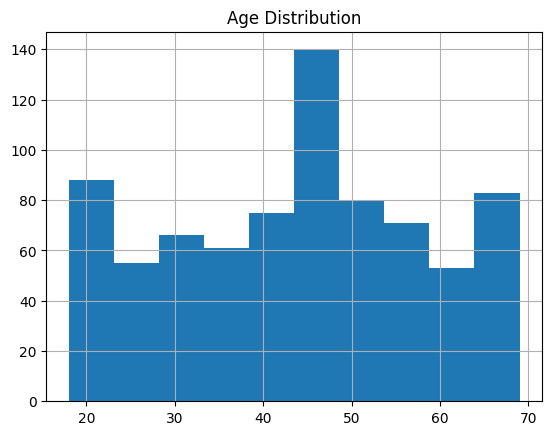

In [81]:
plt.figure()
final_dataset["age"].hist()
plt.title("Age Distribution")
plt.show()

The dataset contains a broad and evenly distributed age range, making it suitable for unbiased demographic analysis.


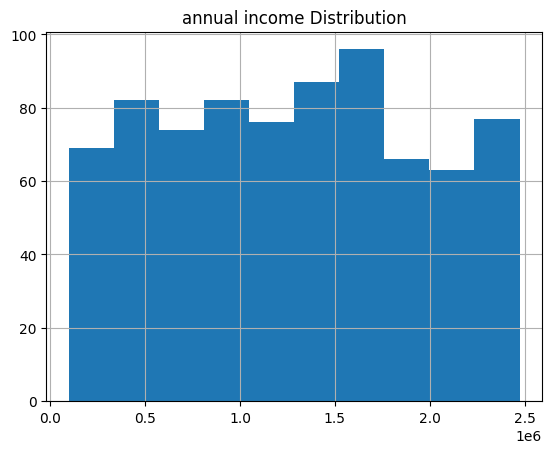

In [84]:
plt.figure()
final_dataset["annual_income"].hist()
plt.title("annual income Distribution")
plt.show()


A histogram showing the distribution of annual incomes ranging from 0 to 2.5 million.

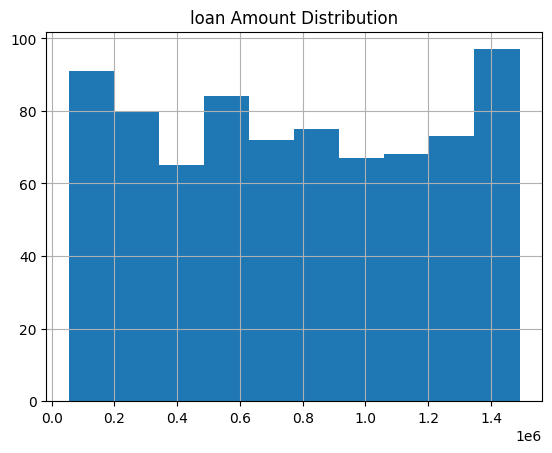

In [86]:
plt.figure()
final_dataset["loan_amount"].hist()
plt.title("loan Amount Distribution")
plt.show()

Visualizing financial distributions in this manner is a critical step in exploratory data analysis. It helps in quickly identifying underlying segments and verifying that extreme outliers have been successfully removed or handled during the initial data cleaning

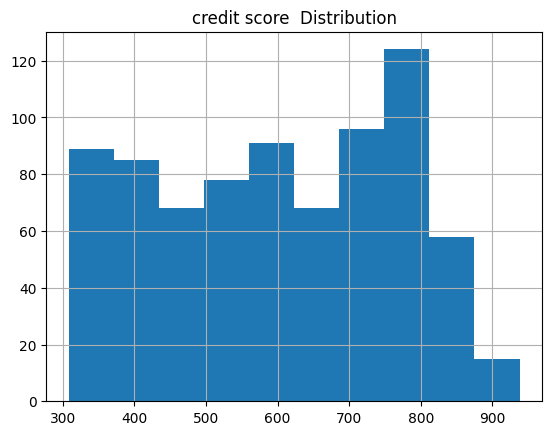

In [88]:

plt.figure()
final_dataset["credit_score"].hist()
plt.title("credit score  Distribution")
plt.show()

A histogram illustrating credit scores from 300 to over 900, with the highest frequency occurring in the 750–800 range.

## Bivariate analysis

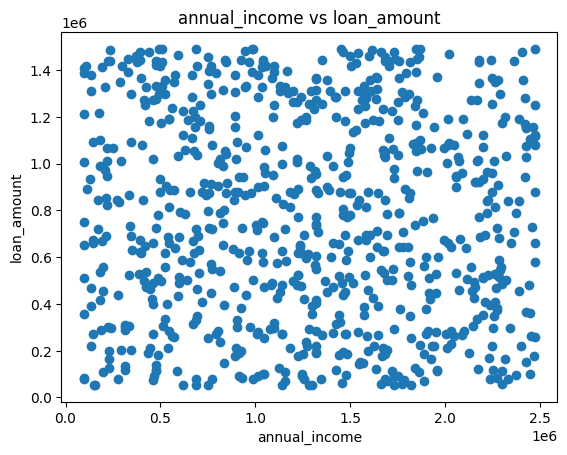

In [99]:
plt.figure()
plt.scatter(final_dataset["annual_income"], final_dataset["loan_amount"])
plt.xlabel("annual_income")
plt.ylabel("loan_amount")
plt.title("annual_income vs loan_amount")
plt.show()

scatter plots that reveal effectively zero linear correlation between the paired financial and demographic variables.

## conclusion

At the last i want to drop some columns for machine learnings purpose.column likes ( "customer_id",
    "gender",
    "education_level",
    "employment_type",
    "income_bin",
    "transaction_quantile",
    "default_flag_missing"
) but for data preprossing and feture engineerings the final_cleaned_transformed_dataset.csv is good and correct.